In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

In [3]:
import io


In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
!pip install yfinance

In [6]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'TSLA']

In [7]:
# Set up End and Start times for data grab (We will analyze for 2 years)
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

In [8]:
#For loop for grabing yahoo finance data and setting as a dataframe
import yfinance as yf
for stock in tech_list:
    # Set DataFrame as the Stock Ticker
    globals()[stock] = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = stock,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "2y"
    )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
company_list = [AAPL, GOOG, TSLA]
company_name = ["APPLE", "GOOGLE", "TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

In [10]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-07-29  144.690002  146.550003  144.580002  145.639999  143.953079   
2021-07-30  144.380005  146.330002  144.110001  145.860001  144.170532   
2021-08-02  146.360001  146.949997  145.250000  145.520004  143.834473   
2021-08-03  145.809998  148.039993  145.179993  147.360001  145.653152   
2021-08-04  147.270004  147.789993  146.279999  146.949997  145.247894   

              Volume company_name  
Date                               
2021-07-29  56699500        APPLE  
2021-07-30  70440600        APPLE  
2021-08-02  62880000        APPLE  
2021-08-03  64786600        APPLE  
2021-08-04  56368300        APPLE

In [11]:
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  255.850006  269.850006  254.119995  269.059998  269.059998   
2023-07-25  272.380005  272.899994  265.000000  265.279999  265.279999   
2023-07-26  263.250000  268.040009  261.750000  264.350006  264.350006   
2023-07-27  268.309998  269.130005  255.300003  255.710007  255.710007   
2023-07-28  259.859985  267.250000  258.230011  266.440002  266.440002   

               Volume company_name  
Date                                
2023-07-24  136508500        TESLA  
2023-07-25  112757300        TESLA  
2023-07-26   95856200        TESLA  
2023-07-27  103697300        TESLA  
2023-07-28  111149300        TESLA

#Adj

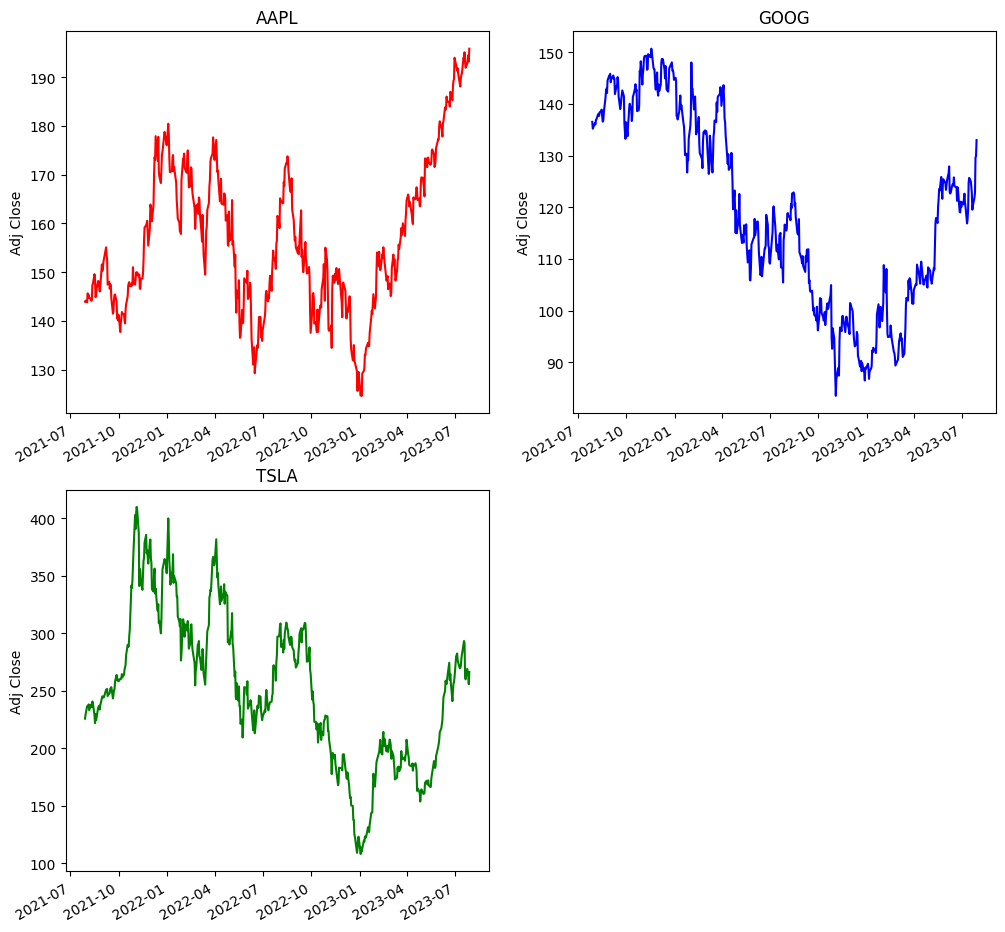

In [12]:
# Let's see a historical view of the closing price of companies

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
colorlist=['Red','Blue','Green']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color=colorlist[i-1])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

#Volume

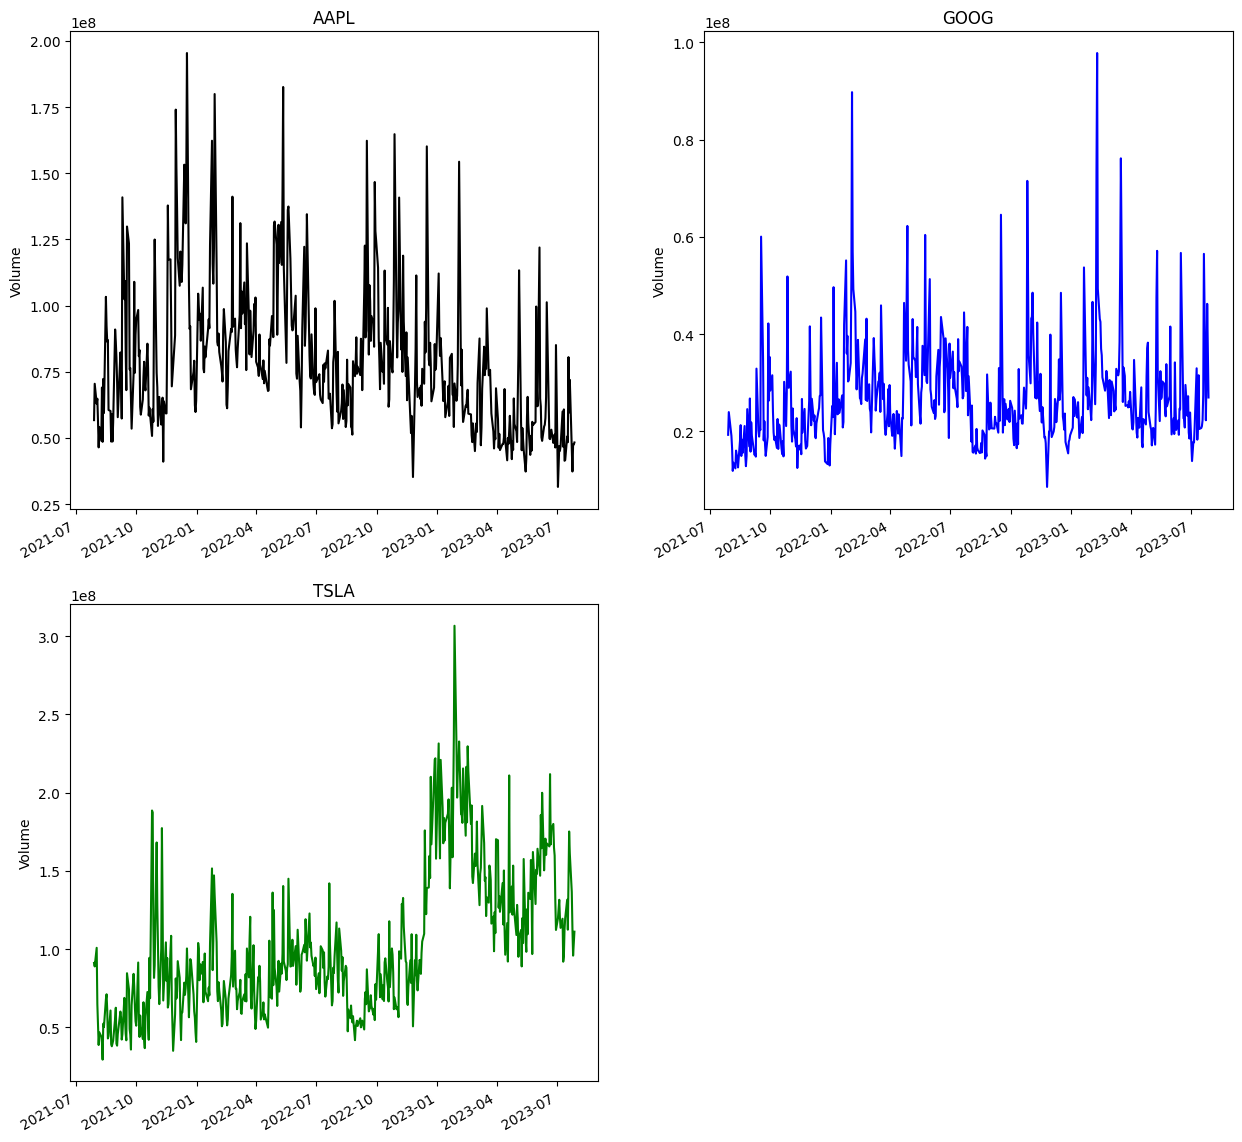

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
colorlist=['Black','Blue','Green']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color=colorlist[i-1])
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")


In [14]:
# Set the Moving Average Day
ma_day = [10, 20, 50]

In [15]:
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [16]:
print(AAPL.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


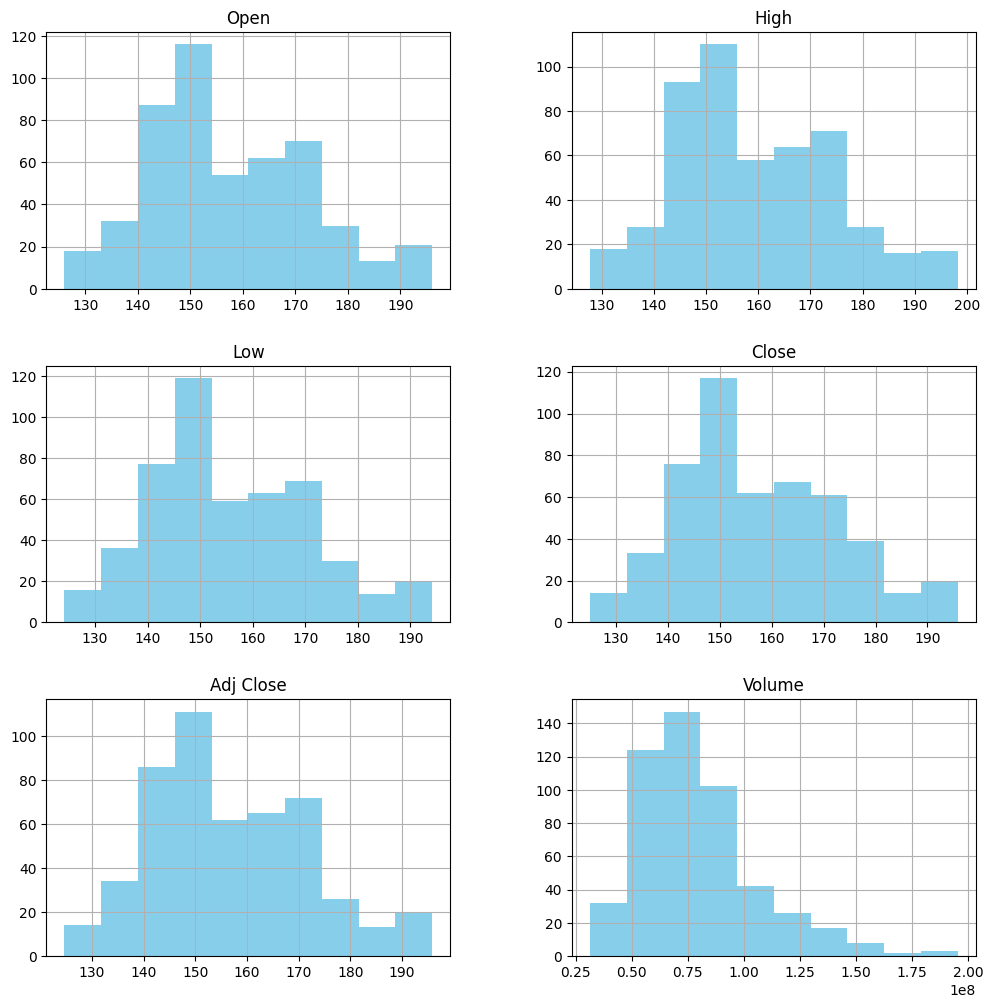

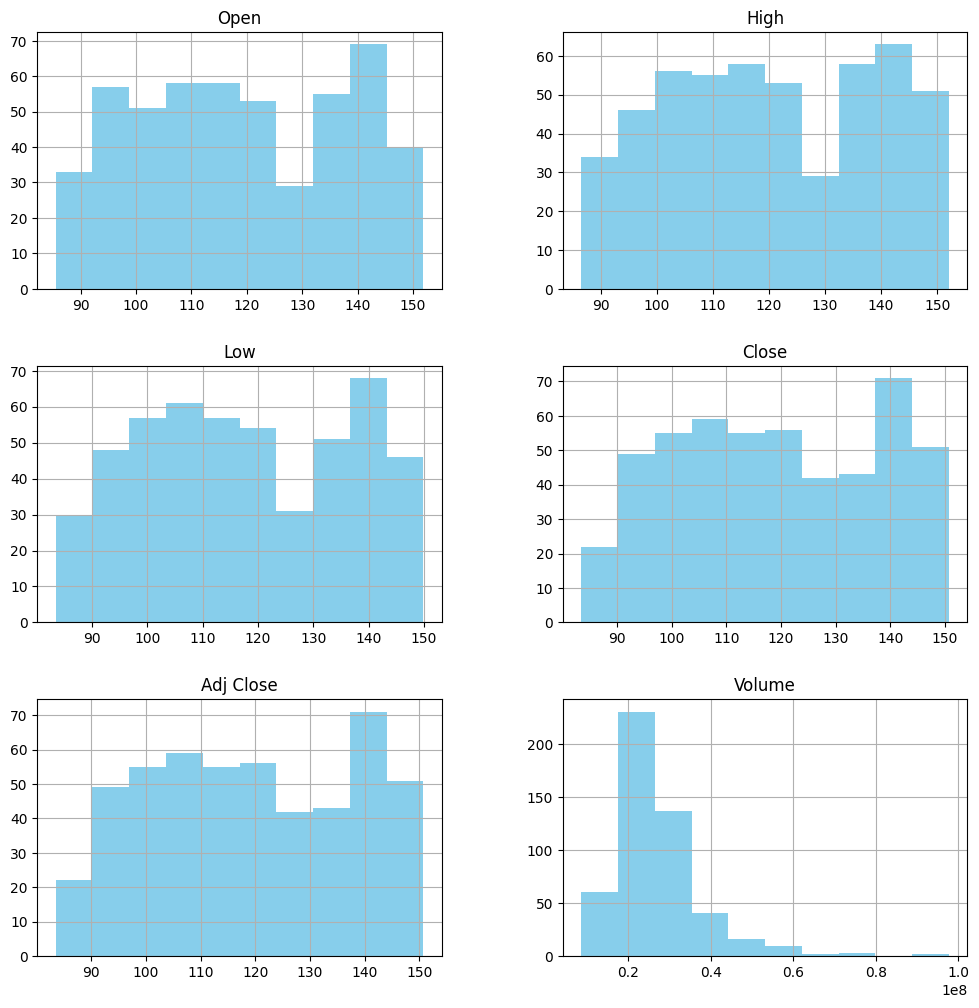

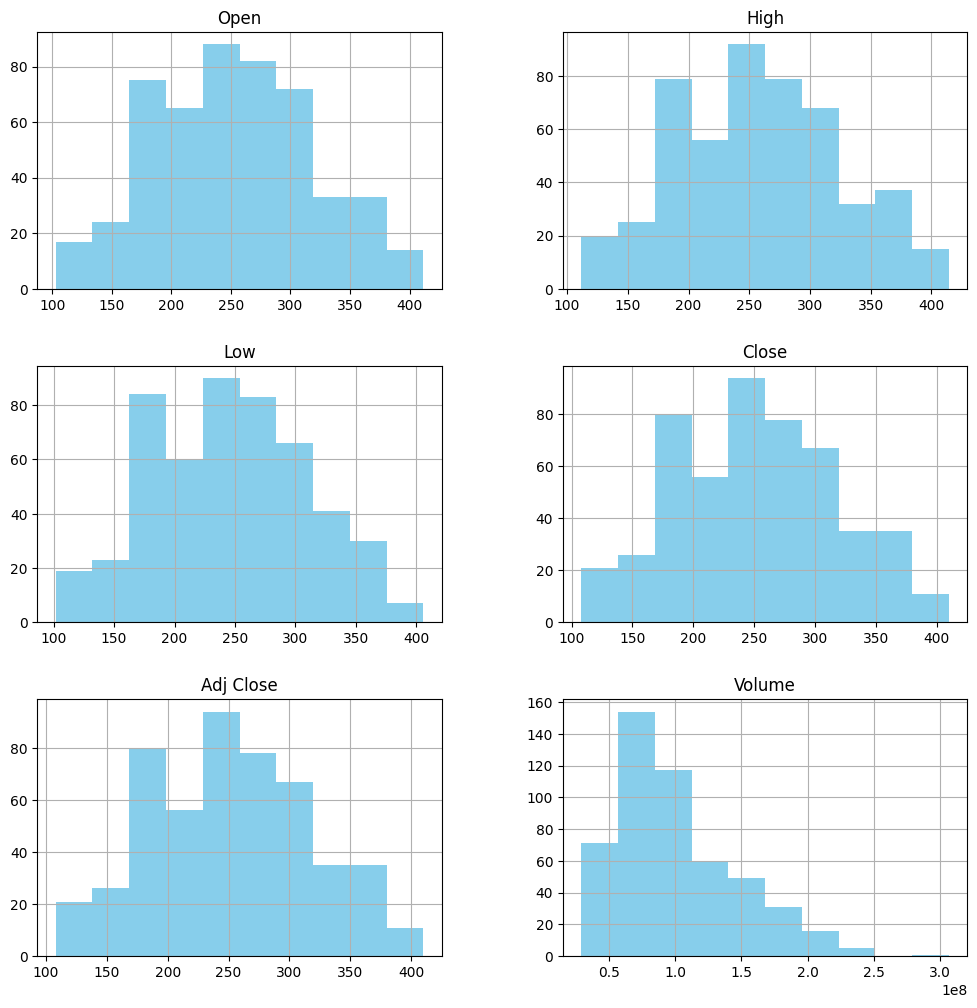

In [17]:
df.groupby("company_name").hist(figsize=(12, 12),color='skyblue');

#Visualization of companies changes over various MA days and 'Adj Close'

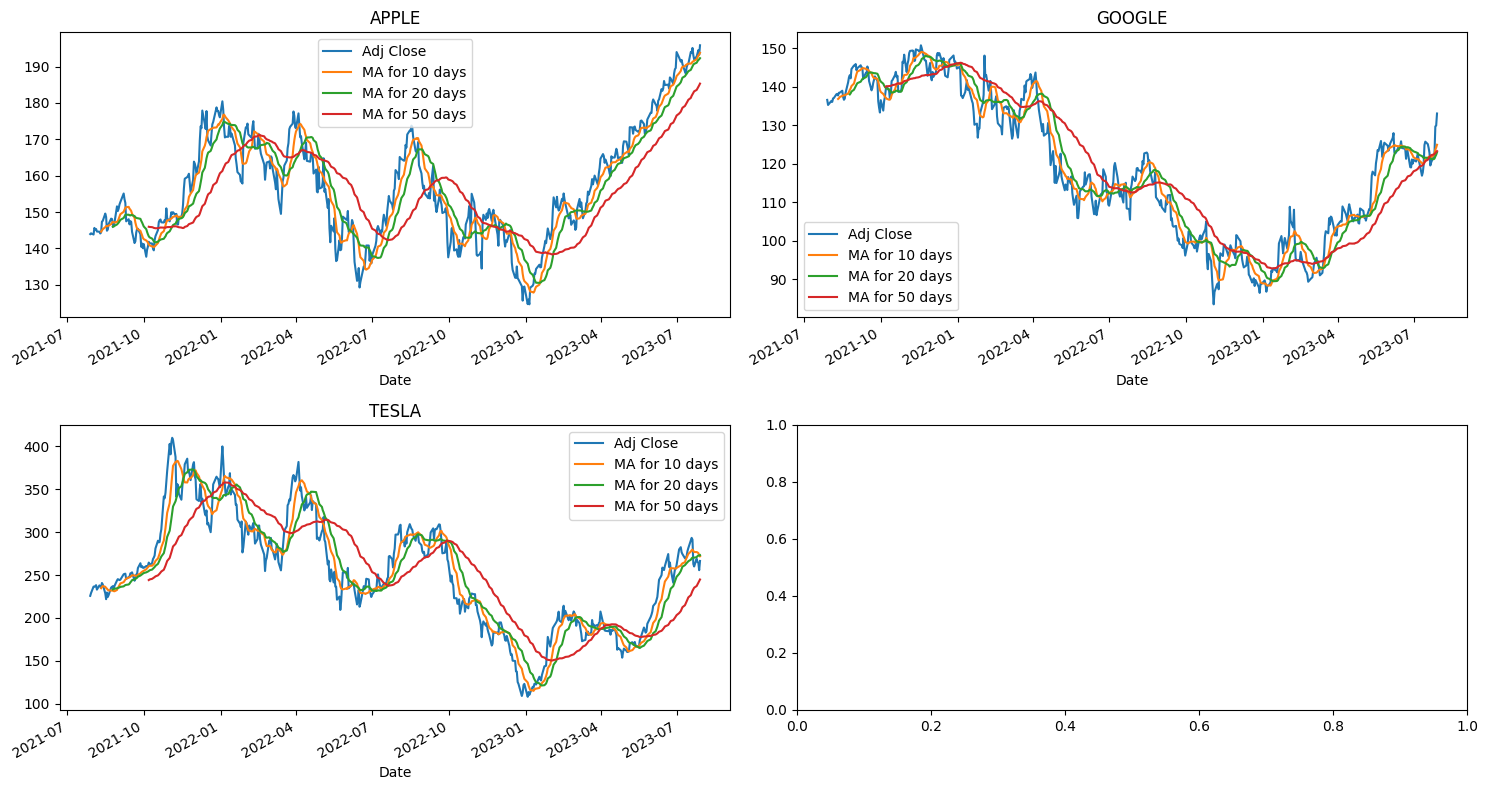

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TESLA')

fig.tight_layout()

#The daily return of the stock on average.

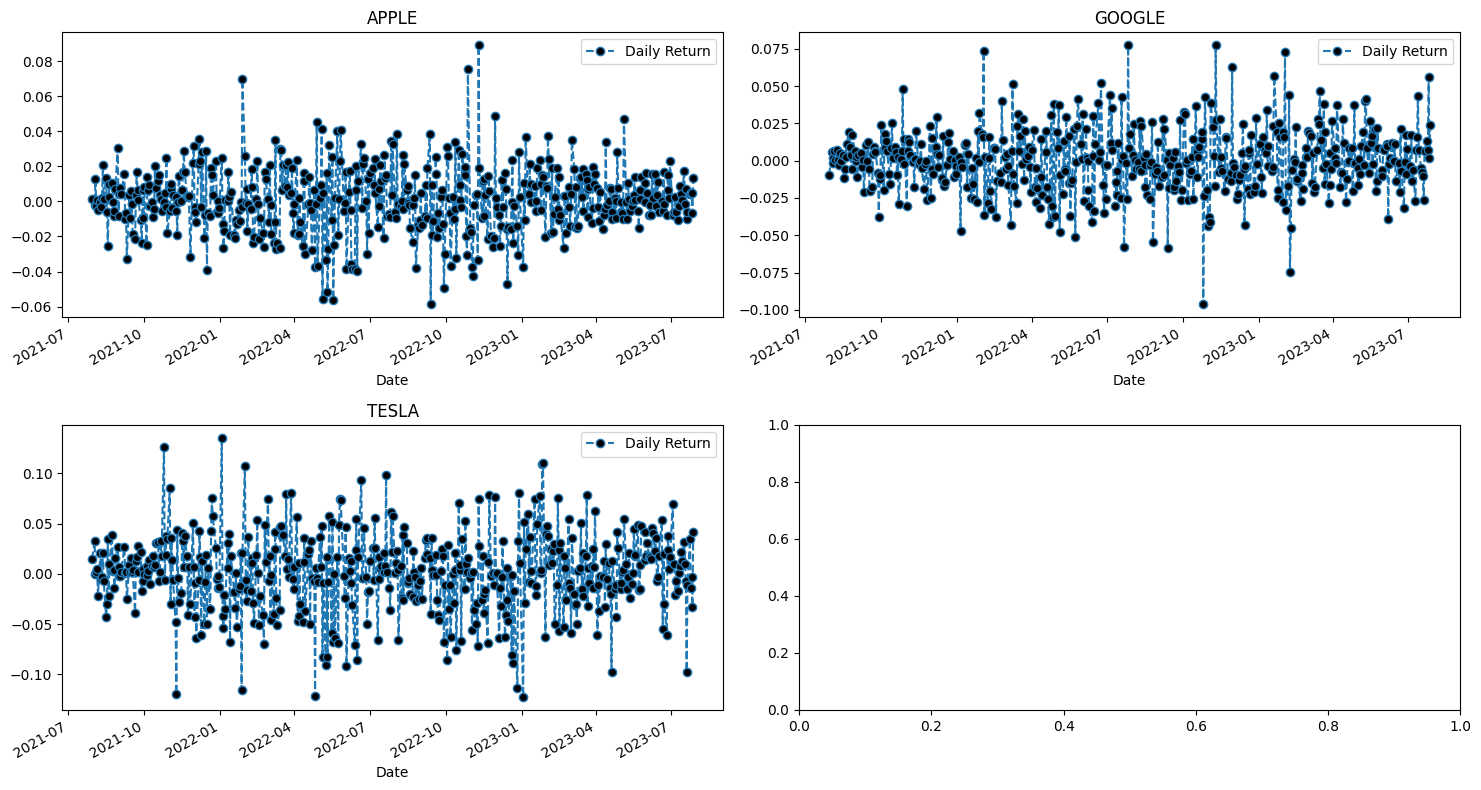

In [19]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[0,1].set_title('GOOGLE')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[1,0].set_title('TESLA')

fig.tight_layout()


APPLE Skewness: 0.166490
APPLE Kurtosis: 1.774870
GOOGLE Skewness: 0.099470
GOOGLE Kurtosis: 1.674555
TESLA Skewness: -0.148135
TESLA Kurtosis: 0.946438


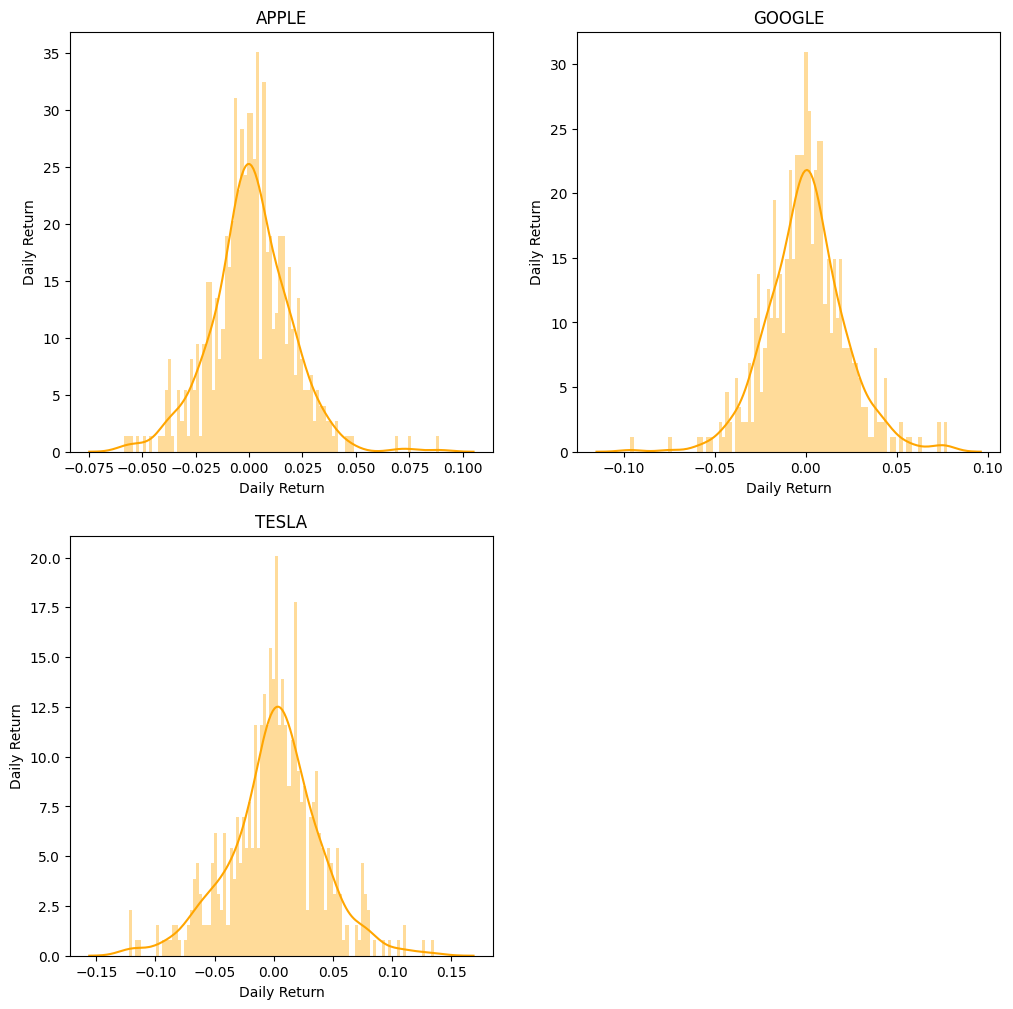

In [20]:
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='orange')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    # Skewness and Kurtosis
    print(f'{company_name[i - 1]}'+" Skewness: %f" % company['Daily Return'].skew())
    print(f'{company_name[i - 1]}'+" Kurtosis: %f" % company['Daily Return'].kurt())

#The correlation between different stocks Adj Close prices.

In [21]:
closing_df =yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = tech_list,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "2y",
    )['Adj Close']


[*********************100%***********************]  3 of 3 completed


In [22]:
closing_df.head()
closing_df.tail()

AAPL        GOOG        TSLA
Date                                          
2023-07-24  192.750000  121.879997  269.059998
2023-07-25  193.619995  122.790001  265.279999
2023-07-26  194.500000  129.660004  264.350006
2023-07-27  193.220001  129.869995  255.710007
2023-07-28  195.830002  133.009995  266.440002

In [23]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

AAPL      GOOG      TSLA
Date                                    
2021-07-29       NaN       NaN       NaN
2021-07-30  0.001510 -0.009664  0.014542
2021-08-02 -0.002331  0.005683  0.032698
2021-08-03  0.012644  0.002136  0.000099
2021-08-04 -0.002782 -0.001845  0.001663

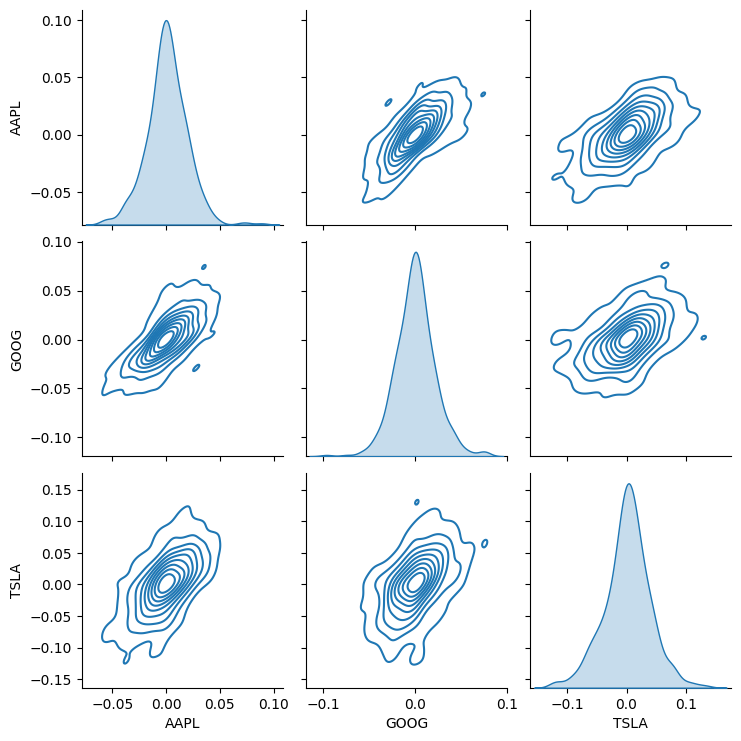

In [24]:
sns.pairplot(tech_rets, kind='kde')

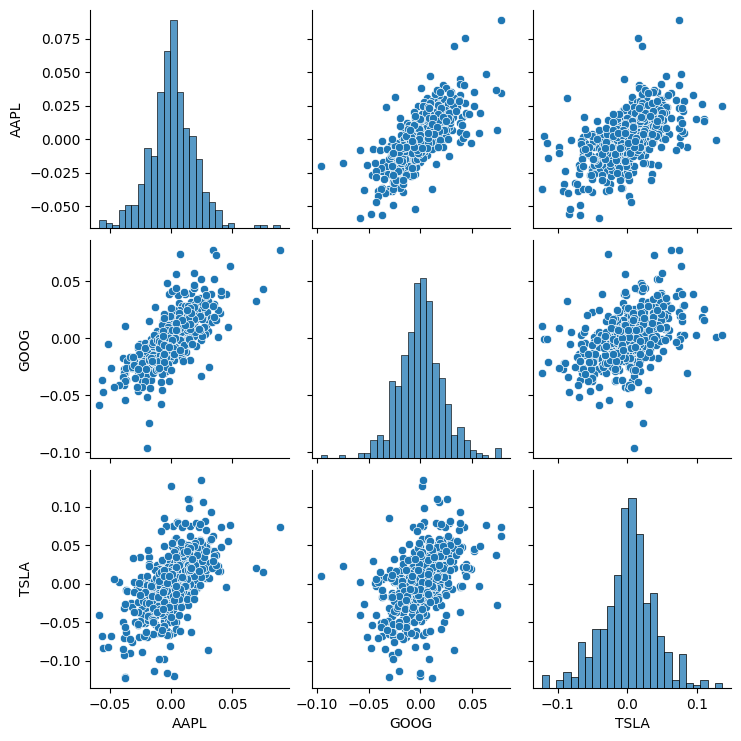

In [25]:
sns.pairplot(tech_rets, kind='scatter')

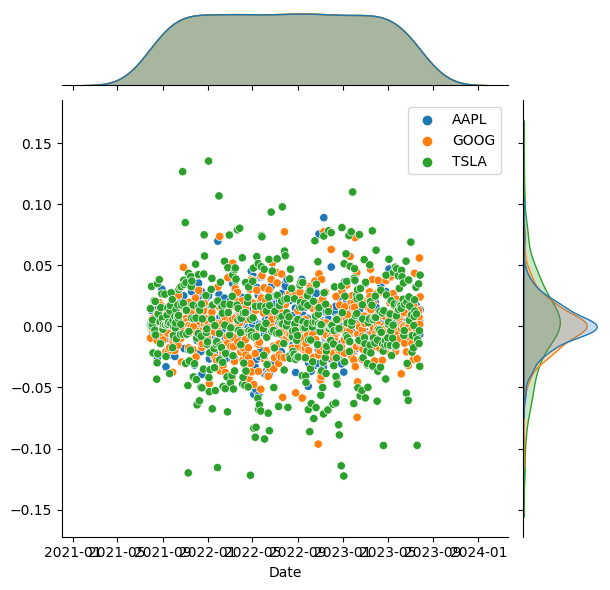

In [26]:
sns.jointplot(tech_rets, kind='scatter')

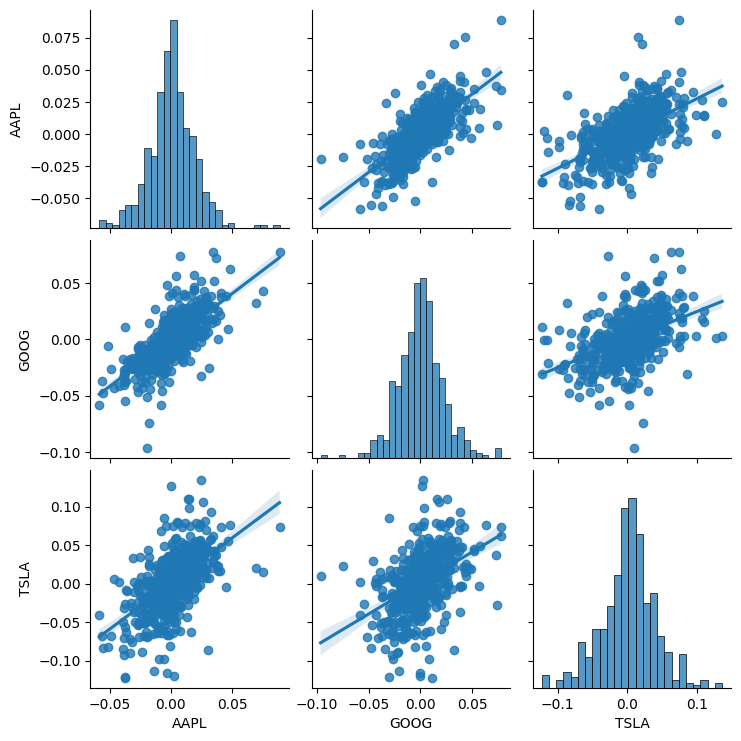

In [27]:
sns.pairplot(tech_rets, kind='reg')

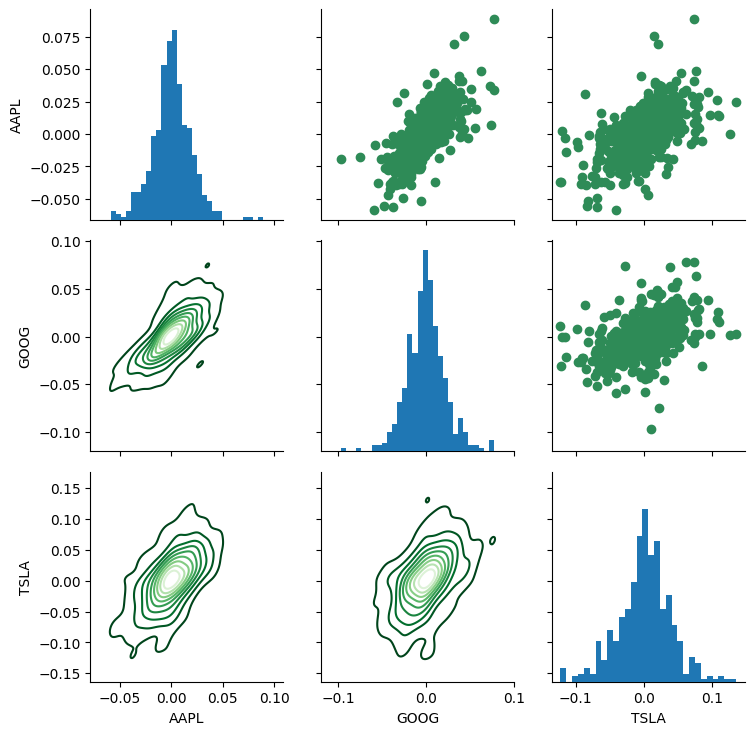

In [28]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='seagreen')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='Greens_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

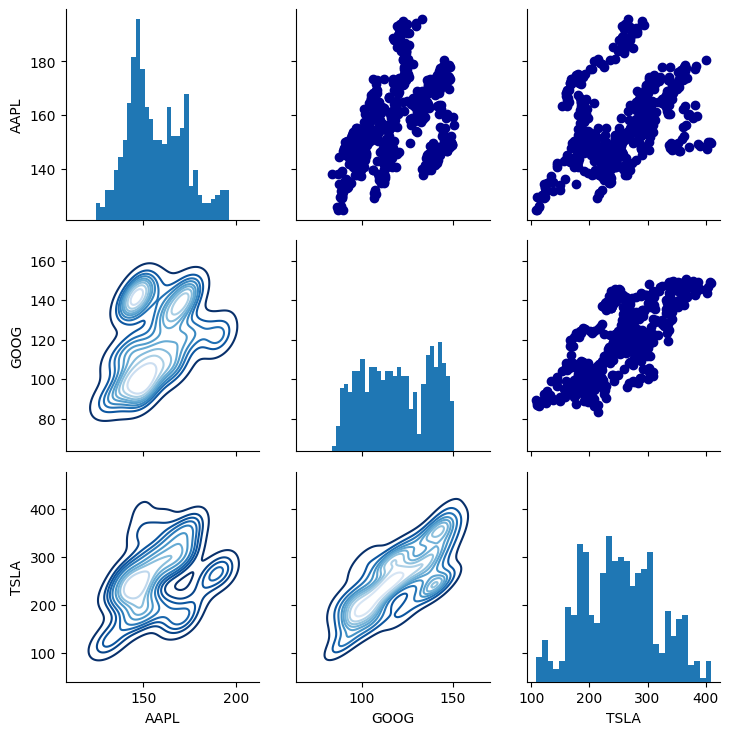

In [29]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='darkblue')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='Blues_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

#Correlation

<Axes: >

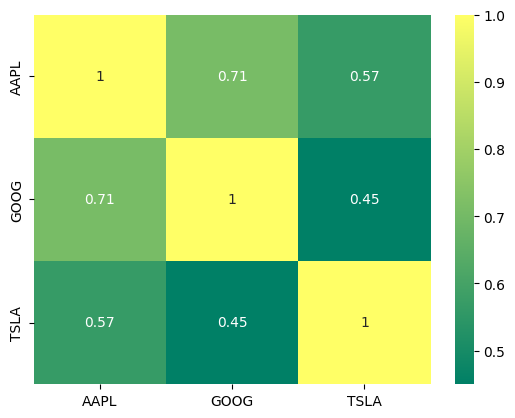

In [30]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<Axes: >

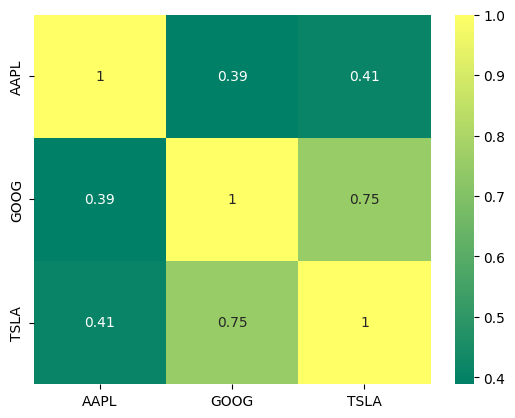

In [31]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

#Risk Analysis

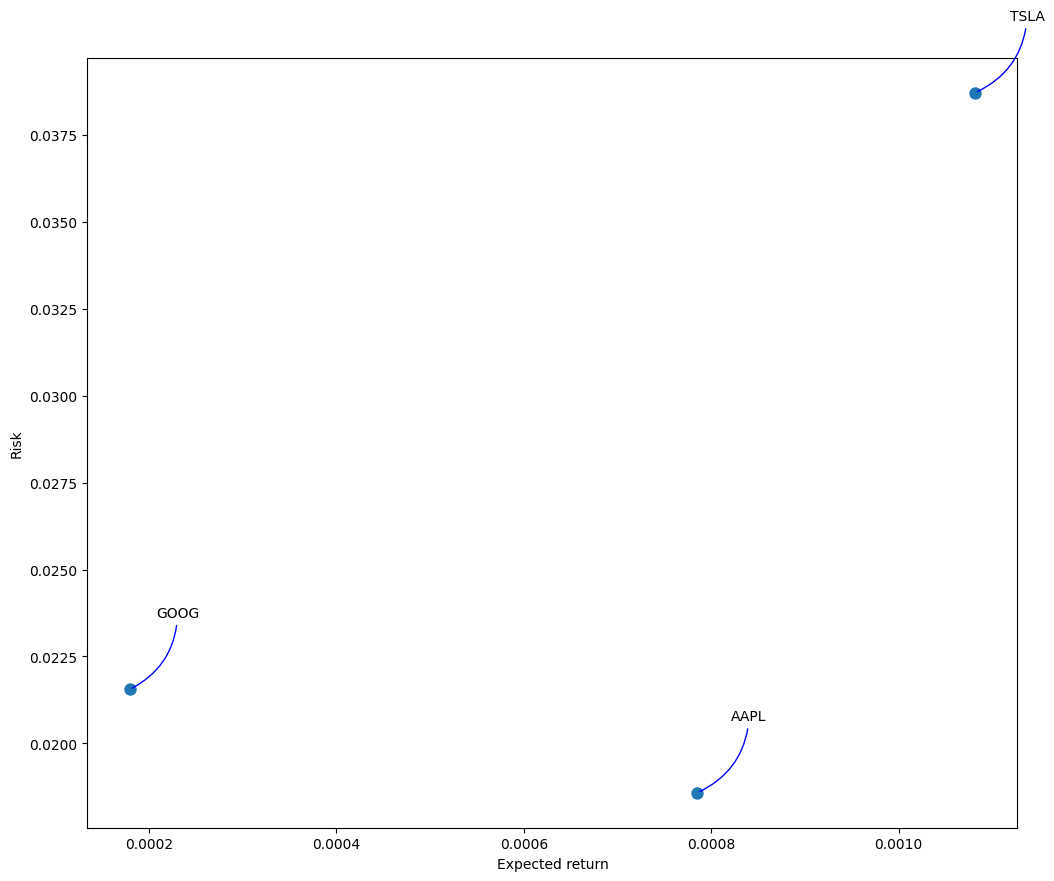

In [32]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [33]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  503.000000  503.000000  503.000000  503.000000  503.000000   
mean   157.347853  159.246163  155.677236  157.549264  156.729024   
std     15.189866   15.106313   15.292949   15.201411   15.279143   
min    126.010002  127.769997  124.169998  125.019997  124.656982   
25%    146.195000  147.900002  145.000000  146.449997  145.395576   
50%    153.880005  156.300003  152.399994  154.479996  153.617523   
75%    168.995003  170.559998  167.019997  168.730003  167.676903   
max    196.020004  198.229996  194.139999  195.830002  195.830002   

             Volume  MA for 10 days  MA for 20 days  MA for 50 days  \
count  5.030000e+02      494.000000      484.000000      454.000000   
mean   7.937015e+07      156.501214      156.243264      155.511309   
std    2.645582e+07       14.542341       13.764803       11.332707   
min    3.145820e+07      127.883585      130.563779      138.357684   
25%    5.991460e+07      145.472919      145.367892      145.764071   
50%    7.480520e+07      153.138614      153.063478      154.823666   
75%    9.107065e+07      167.278549      167.172349      165.086239   
max    1.954327e+08      193.781001      192.287501      185.304000   

       Daily Return  
count    502.000000  
mean       0.000785  
std        0.018583  
min       -0.058680  
25%       -0.009345  
50%        0.000621  
75%        0.011854  
max        0.088975

In [34]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-07-29 to 2023-07-28
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            503 non-null    float64
 1   High            503 non-null    float64
 2   Low             503 non-null    float64
 3   Close           503 non-null    float64
 4   Adj Close       503 non-null    float64
 5   Volume          503 non-null    int64  
 6   company_name    503 non-null    object 
 7   MA for 10 days  494 non-null    float64
 8   MA for 20 days  484 non-null    float64
 9   MA for 50 days  454 non-null    float64
 10  Daily Return    502 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 47.2+ KB


In [35]:
Column_List = ["High", "Low","Open","Close", "Volume","Adj Close"]

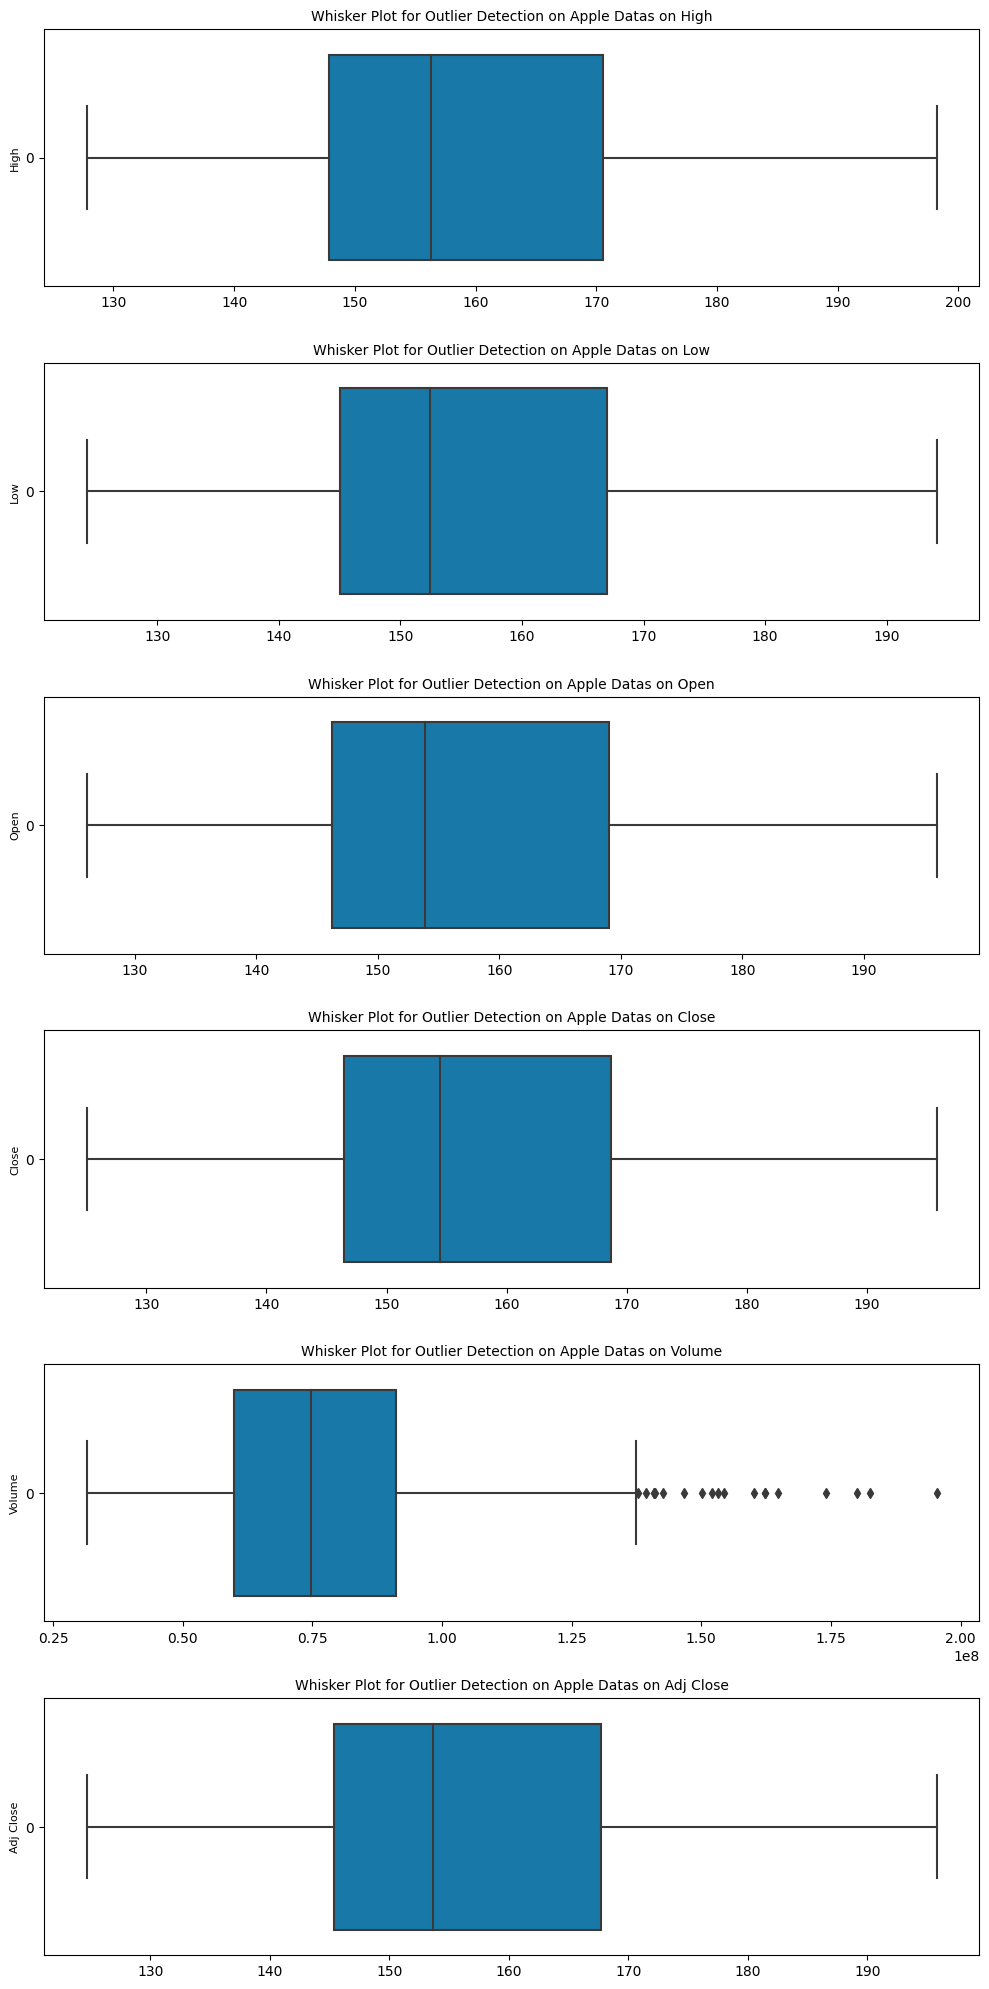

In [36]:
# Generate whisker plots to detect the presence of any outliers
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(AAPL[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on Apple Datas on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

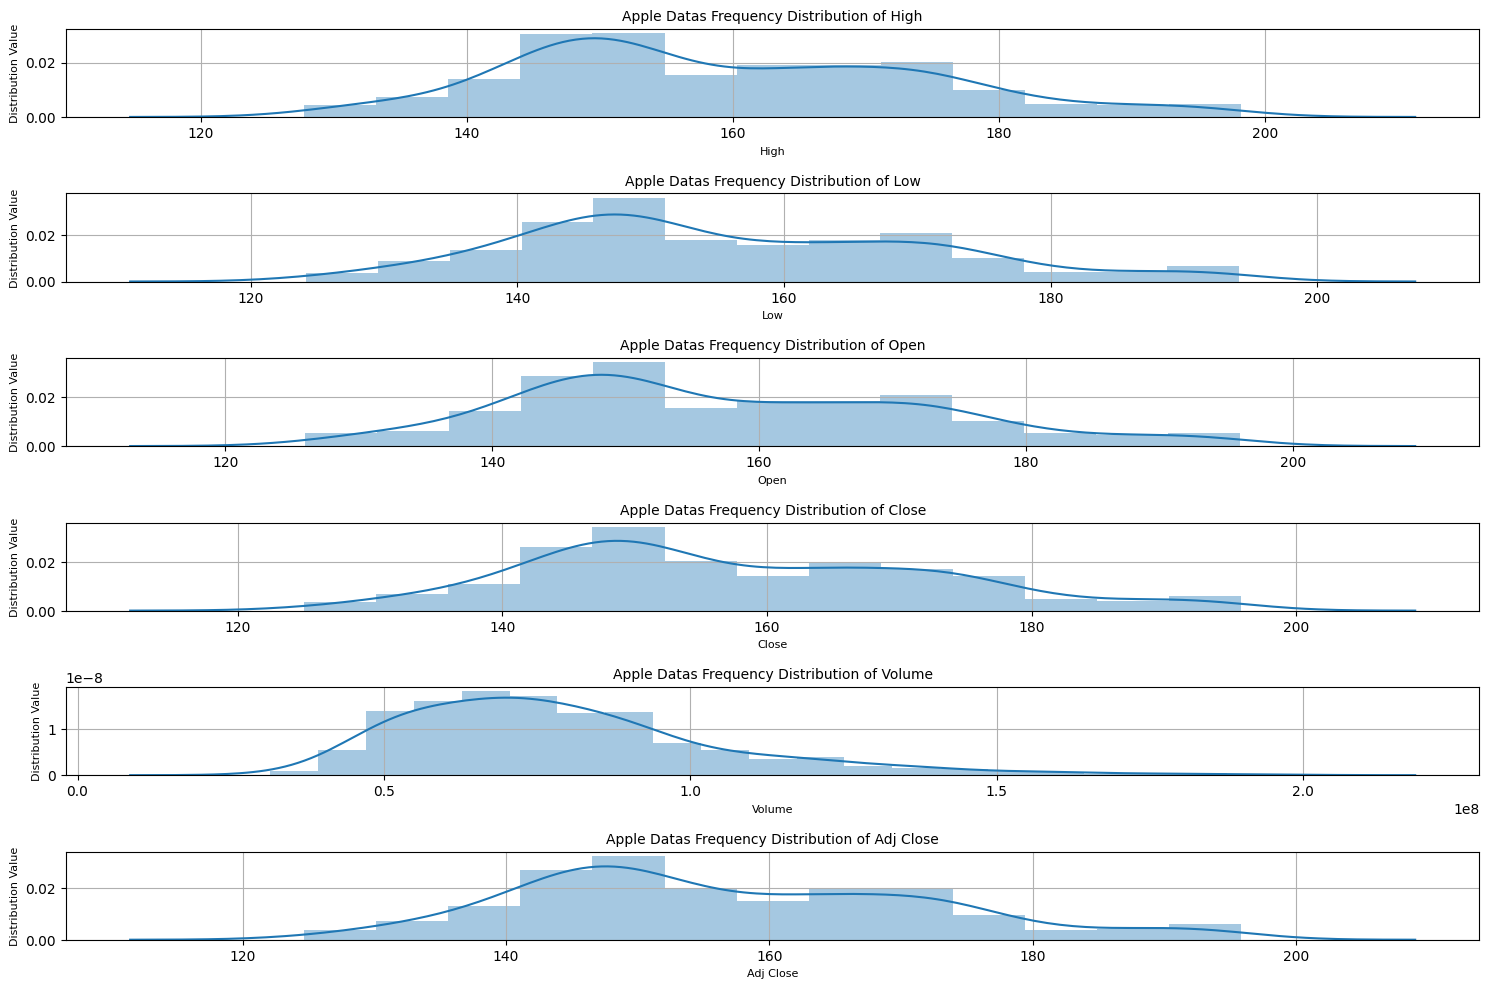

In [37]:
# Visualize the spread and skweness through the distribution plot

# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(AAPL[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Apple Datas Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make marking

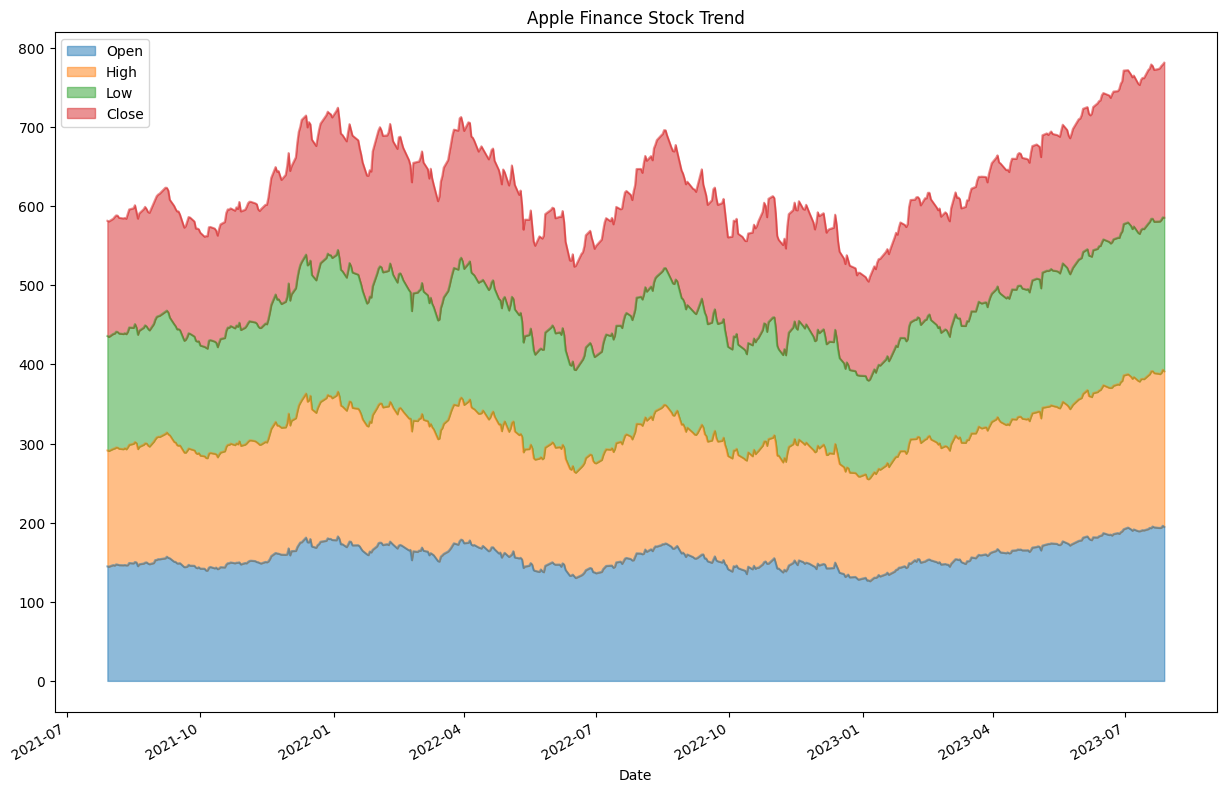

In [38]:
AAPL[["Open","High","Low","Close"]].plot.area(figsize=(15,10),alpha=0.5);
plt.title('Apple Finance Stock Trend')
plt.show()

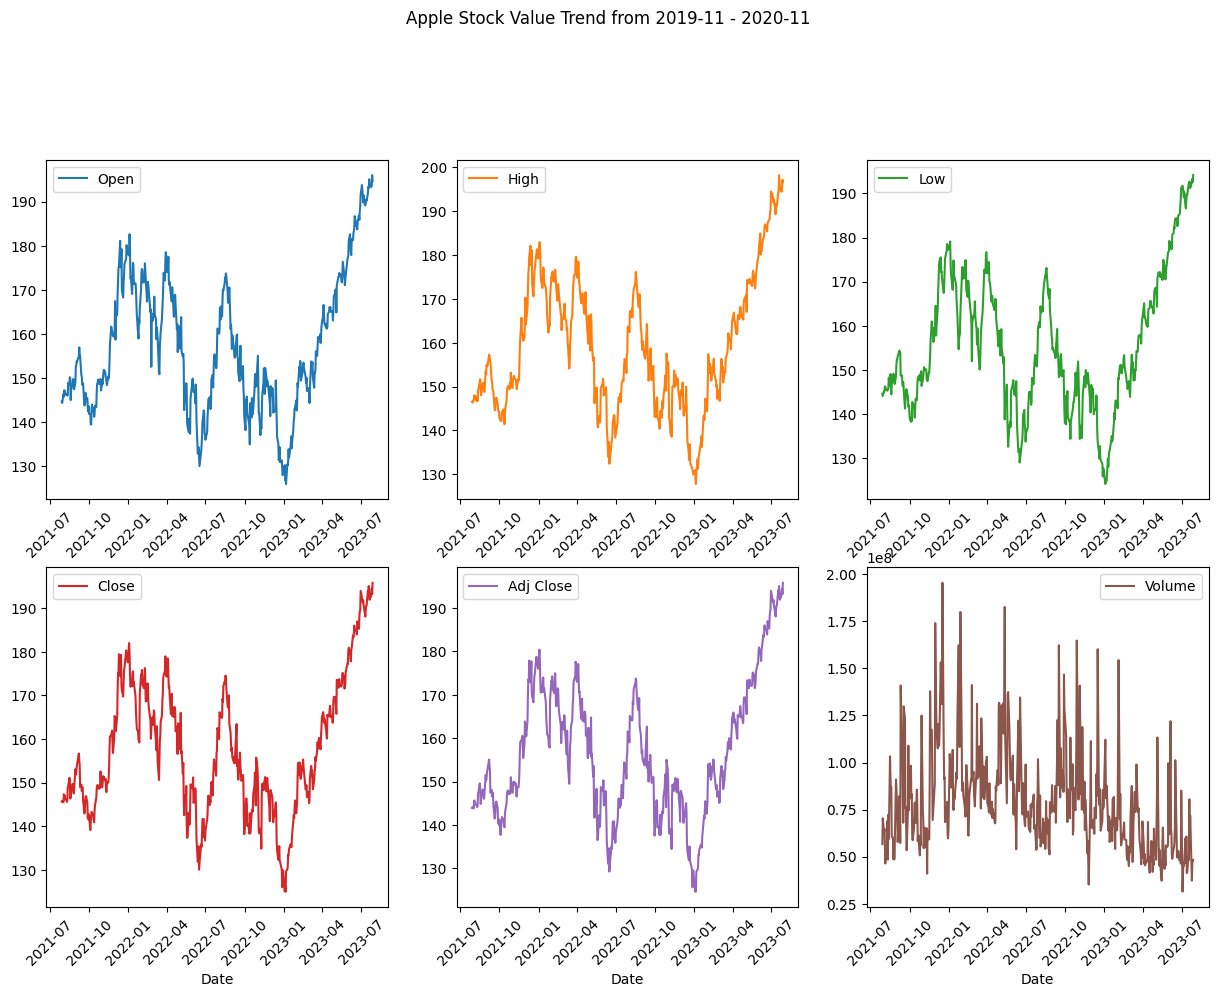

In [39]:
# Create a list for numerical columns that are to be visualized
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Plot to view the same
AAPL.plot(y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Apple Stock Value Trend from 2019-11 - 2020-11", rot = 45);

#Predicting the closing price stock price of APPLE :¶

In [40]:
#Get the stock quote
start = datetime(end.year - 2, end.month, end.day)
df = yf.download("AAPL",start='2018-06-30',end ="2020-06-30")
df

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-07-02  45.955002  46.825001  45.855000  46.794998  44.720821   70925200
2018-07-03  46.947498  46.987499  45.884998  45.980000  43.941952   55819200
2018-07-05  46.314999  46.602501  46.070000  46.349998  44.295551   66416800
2018-07-06  46.355000  47.107498  46.299999  46.992500  44.909569   69940800
2018-07-09  47.375000  47.669998  47.325001  47.645000  45.533154   79026400
...               ...        ...        ...        ...        ...        ...
2020-06-23  91.000000  93.095001  90.567497  91.632500  89.964935  212155600
2020-06-24  91.250000  92.197502  89.629997  90.014999  88.376892  192623200
2020-06-25  90.175003  91.250000  89.392502  91.209999  89.550140  137522400
2020-06-26  91.102501  91.330002  88.254997  88.407501  86.798630  205256800
2020-06-29  88.312500  90.542503  87.820000  90.445000  88.799057  130646000

[502 rows x 6 columns]

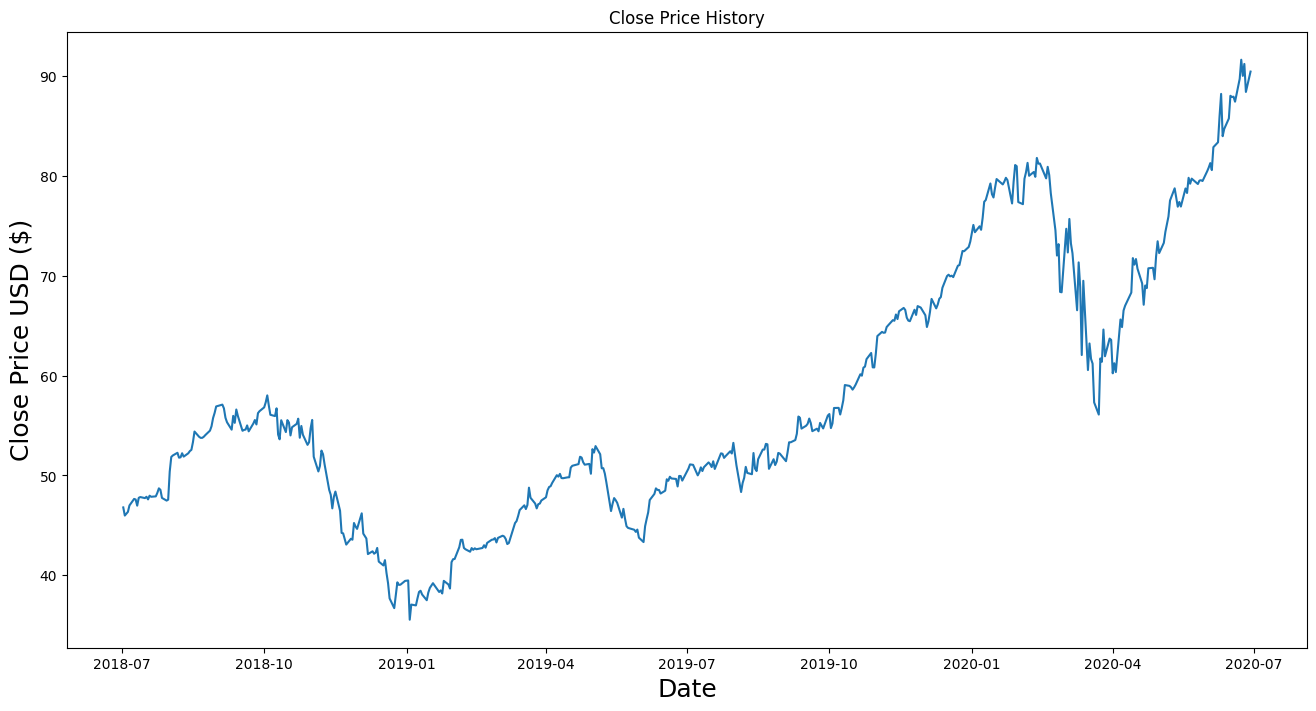

In [41]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [42]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

402

In [43]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[0:5]

array([[0.20054378],
       [0.18601229],
       [0.1926094 ],
       [0.20406526],
       [0.21569939]])

In [44]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        # Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.20054378, 0.18601229, 0.1926094 , 0.20406526, 0.21569939,
       0.21467418, 0.2036641 , 0.21770526, 0.21904253, 0.21717038,
       0.21957741, 0.214897  , 0.22149418, 0.21953286, 0.22029063,
       0.22648658, 0.23459929, 0.2318802 , 0.21748237, 0.21271286,
       0.21440667, 0.26437549, 0.29063028, 0.29330482, 0.29811895,
       0.28938218, 0.29000623, 0.29727201, 0.29125433, 0.29722739,
       0.30115003, 0.30333424, 0.31706341, 0.33605242, 0.3266025 ,
       0.32473028, 0.3247749 , 0.32673622, 0.32972275, 0.33765713,
       0.34550234, 0.360123  , 0.36926093, 0.38085051, 0.38410448,
       0.37746275, 0.36065795, 0.3526344 , 0.33939556, 0.36400109,
       0.35160919, 0.37541233, 0.36395647, 0.33738969, 0.3389944 ,
       0.33957383, 0.34697333, 0.33640903, 0.35036102, 0.35660159])]
[0.34871176341517196]

[array([0.20054378, 0.18601229, 0.1926094 , 0.20406526, 0.21569939,
       0.21467418, 0.2036641 , 0.21770526, 0.21904253, 0.21717038,
       0.21957741, 0.214897  , 0.22

In [45]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#Creating LSTM Model

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model_lstm.fit(x_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
18/18 [==============================] - 6s 59ms/step - loss: 0.0282
Epoch 2/20
18/18 [==============================] - 1s 60ms/step - loss: 0.0036
Epoch 3/20
18/18 [==============================] - 1s 59ms/step - loss: 0.0016
Epoch 4/20
18/18 [==============================] - 1s 59ms/step - loss: 0.0014
Epoch 5/20
18/18 [==============================] - 1s 60ms/step - loss: 0.0012
Epoch 6/20
18/18 [==============================] - 1s 59ms/step - loss: 0.0011
Epoch 7/20
18/18 [==============================] - 1s 59ms/step - loss: 0.0011
Epoch 8/20
18/18 [==============================] - 1s 60ms/step - loss: 0.0010
Epoch 9/20
18/18 [==============================] - 1s 59ms/step - loss: 0.0010
Epoch 10/20
18/18 [==============================] - 2s 99ms/step - loss: 0.0011
Epoch 11/20
18/18 [==============================] - 2s 88ms/step - loss: 0.0011
Epoch 12/20
18/18 [==============================] - 1s 59ms/step - loss: 8.8320e-04
Epoch 13/20
18/18 [==============

#Creating RNN model

In [47]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
model_rnn = Sequential()

# adding first RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = True,input_shape = (x_train.shape[1],1)))
model_rnn.add(Dropout(0.2))
# adding second RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
model_rnn.add(Dropout(0.2))
# adding third RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = False))
model_rnn.add(Dropout(0.2))
# adding the output layer
model_rnn.add(Dense(units = 1))
# compiling RNN
model_rnn.compile(optimizer = "adam", loss = "mean_squared_error")
# fitting the RNN
model_rnn.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
11/11 [==============================] - 4s 46ms/step - loss: 0.4612
Epoch 2/100
11/11 [==============================] - 0s 45ms/step - loss: 0.2928
Epoch 3/100
11/11 [==============================] - 0s 43ms/step - loss: 0.2578
Epoch 4/100
11/11 [==============================] - 0s 45ms/step - loss: 0.1678
Epoch 5/100
11/11 [==============================] - 0s 43ms/step - loss: 0.1597
Epoch 6/100
11/11 [==============================] - 1s 46ms/step - loss: 0.1377
Epoch 7/100
11/11 [==============================] - 0s 44ms/step - loss: 0.1106
Epoch 8/100
11/11 [==============================] - 1s 47ms/step - loss: 0.0912
Epoch 9/100
11/11 [==============================] - 1s 46ms/step - loss: 0.0787
Epoch 10/100
11/11 [==============================] - 1s 45ms/step - loss: 0.0623
Epoch 11/100
11/11 [==============================] - 0s 45ms/step - loss: 0.0521
Epoch 12/100
11/11 [==============================] - 1s 46ms/step - loss: 0.0518
Epoch 13/100
11/11 [=====

In [48]:
# Get the LSTM model predicted price values
predictions_lstm = model_lstm.predict(x_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

4/4 [==============================] - 1s 18ms/step


In [49]:
# Get the RNN models predicted price values
predictions_rnn = model_rnn.predict(x_test)
predictions_rnn = scaler.inverse_transform(predictions_rnn)

4/4 [==============================] - 0s 12ms/step


In [50]:
from sklearn import metrics

# Get the root mean squared error (RMSE)
mse_lstm = metrics.mean_squared_error(y_test, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)

print("LSTM Model RMSE: ",rmse_lstm)
# Get r2 score
r2_lstm = metrics.r2_score(y_test, predictions_lstm)
print("LSTM Model r2: ",r2_lstm)

LSTM Model RMSE:  4.047856998023387
LSTM Model r2:  0.7809368343005243


In [51]:
# Get the root mean squared error (RMSE)
mse_rnn = metrics.mean_squared_error(y_test, predictions_rnn)
rmse_rnn = np.sqrt(mse_rnn)

print("RNN Model RMSE: ",rmse_rnn)
# Get r2 score
r2_rnn = metrics.r2_score(y_test, predictions_rnn)
print("RNN Model r2: ",r2_rnn)

RNN Model RMSE:  2.801194381964391
RNN Model r2:  0.8950927434449374


#Plotting Train Data, Validation Data and Predictions RNN Model

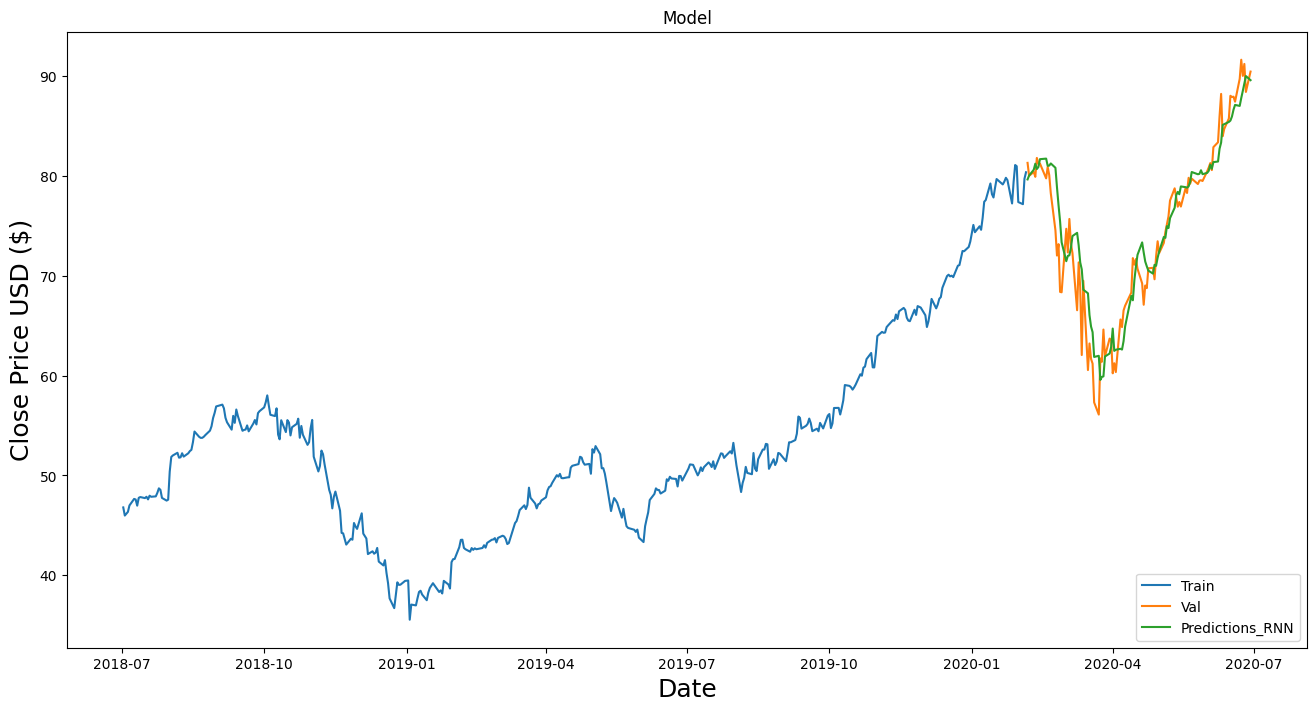

In [52]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions_RNN'] = predictions_rnn
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_RNN']])
plt.legend(['Train', 'Val', 'Predictions_RNN'], loc='lower right')
plt.show()

In [53]:
#Show the valid and predicted prices
valid[0:10]

Close  Predictions_RNN
Date                                  
2020-02-06  81.302498        79.644417
2020-02-07  80.007500        80.034653
2020-02-10  80.387497        80.613075
2020-02-11  79.902496        81.219040
2020-02-12  81.800003        80.685440
2020-02-13  81.217499        80.886391
2020-02-14  81.237503        81.671921
2020-02-18  79.750000        81.728065
2020-02-19  80.904999        81.008575
2020-02-20  80.074997        81.027740

#Plotting Train Data, Validation Data and Predictions LSTM Model

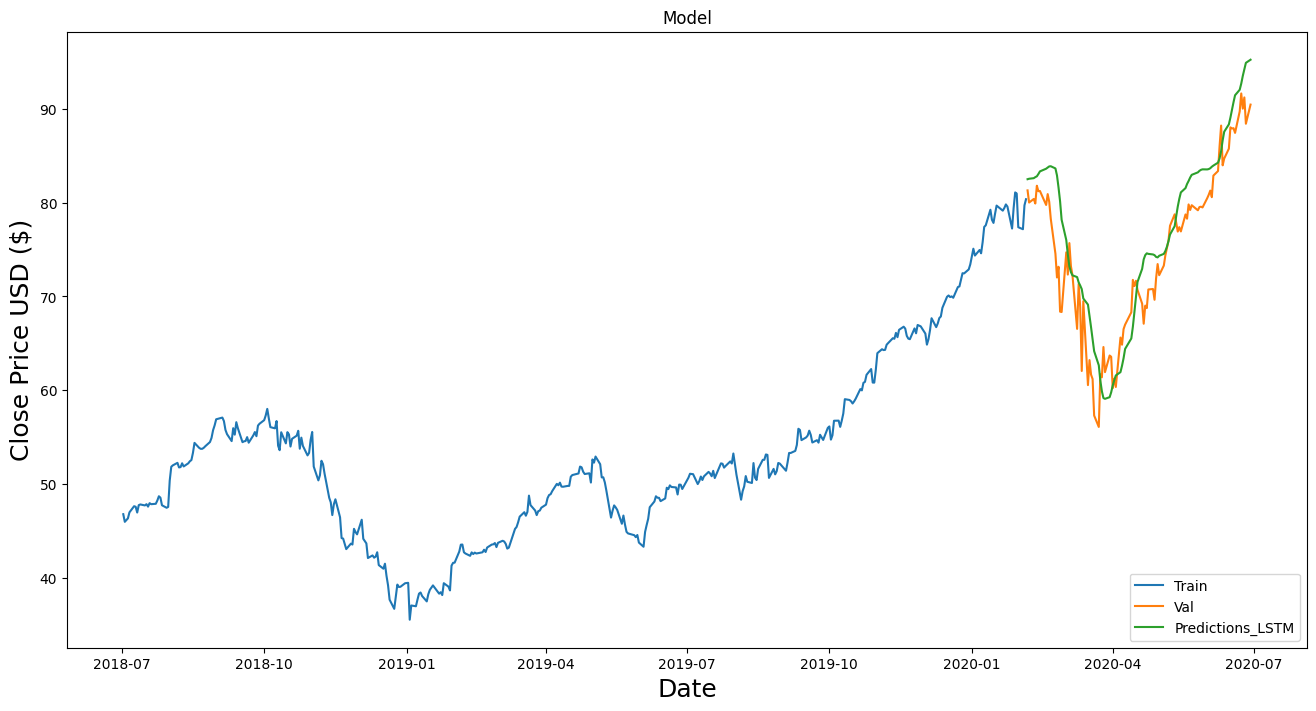

In [54]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions_LSTM'] = predictions_lstm
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_LSTM']])
plt.legend(['Train', 'Val', 'Predictions_LSTM'], loc='lower right')
plt.show()


In [55]:
#Show the valid and predicted prices
valid[0:10]

Close  Predictions_LSTM
Date                                   
2020-02-06  81.302498         82.493614
2020-02-07  80.007500         82.542702
2020-02-10  80.387497         82.603737
2020-02-11  79.902496         82.714882
2020-02-12  81.800003         82.802010
2020-02-13  81.217499         83.050652
2020-02-14  81.237503         83.327652
2020-02-18  79.750000         83.612877
2020-02-19  80.904999         83.738083
2020-02-20  80.074997         83.858810

## Using Random Forest Regression

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import metrics

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [102]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 42)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=500, random_state=42)

In [103]:
y_pred=regressor.predict([[6.5]])
y_pred

array([35.78461008])

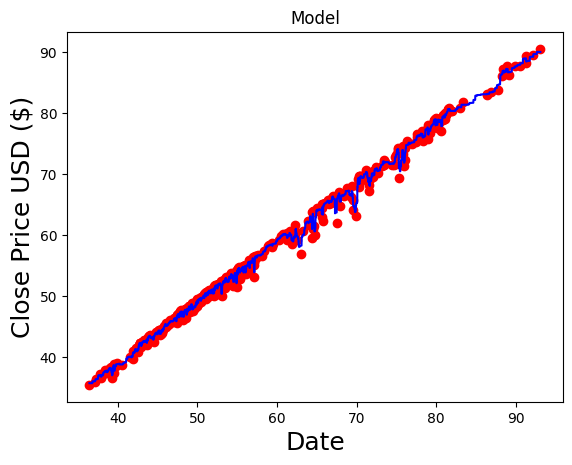

In [104]:
#higher resolution graph
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X,y, color='red') #plotting real points
plt.plot(X_grid, regressor.predict(X_grid),color='blue') #plotting for predict points

plt.title("Model")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

#using linear regression

In [106]:
from sklearn.linear_model import LinearRegression

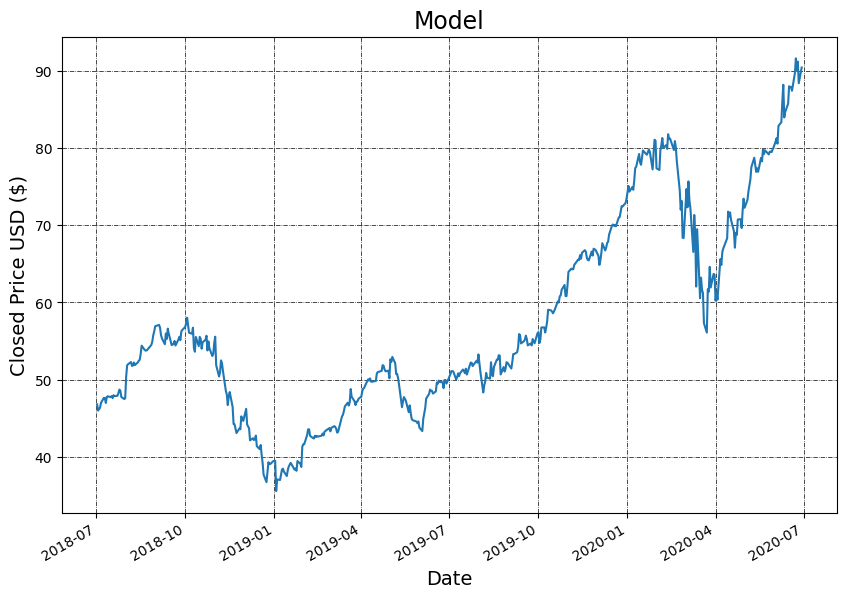

In [108]:
df['Close'].plot(figsize=(10, 7))
plt.title("Model", fontsize=17)
plt.ylabel('Closed Price USD ($)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [111]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [114]:
df = df.drop(columns='Open')

In [117]:
def create_train_test_set(df):

    features = df.drop(columns=['Close'], axis=1)
    target = df['Close']


    data_len = df.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    x_train, x_val,x_test = features[:train_split], features[train_split:val_split], features[val_split:]
    y_train, y_val, y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(x_train.shape, x_val.shape, x_test.shape)
    print(y_train.shape, y_val.shape, y_test.shape)

    return x_train, x_val, x_test, y_train, y_val, y_test


In [118]:
x_train, x_val, x_test, y_train, y_val, y_test = create_train_test_set(df)

Historical Stock Data length is -  502
Training Set length -  441
Validation Set length -  50
Test Set length -  10
(441, 4) (50, 4) (11, 4)
(441,) (50,) (11,)


Prediction

In [119]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [120]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 8.73348336e-02  1.66099871e-01  7.50876366e-01 -1.92606237e-10]
LR Intercept: 
 1.1053844107722455


In [121]:
print("Performance (R^2): ", lr.score(x_train, y_train))

Performance (R^2):  0.9994167393071587


In [122]:
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [123]:
y_train_pred = lr.predict(x_train)
y_val_pred = lr.predict(x_val)
y_test_pred = lr.predict(x_test)

In [124]:
print("Training R-squared: ",round(metrics.r2_score(y_train,y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(y_train,y_train_pred),2))
print('Training MAPE:', round(get_mape(y_train,y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(y_train,y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(y_train,y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(y_val,y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(y_val,y_val_pred),2))
print('Validation MAPE:', round(get_mape(y_val,y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(y_train,y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(y_val,y_val_pred),2))

print(' ')

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.39
Training Mean Squared Error: 0.07
Training RMSE:  0.26
Training MAE:  0.21
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.3
Validation Mean Squared Error: 0.07
Validation RMSE:  0.27
Validation MAE:  0.22
 


In [125]:
print("Test R-squared: ",round(metrics.r2_score(y_test,y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(y_test,y_test_pred),2))
print('Test MAPE:', round(get_mape(y_test,y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(y_test,y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(y_test,y_test_pred),2))

Test R-squared:  0.98
Test Explained Variation:  0.99
Test MAPE: 0.22
Test Mean Squared Error: 0.06
Test RMSE:  0.24
Test MAE:  0.2


In [126]:
df_pred = pd.DataFrame(y_val.values, columns=['Actual'], index=y_val.index)
df_pred['Predicted'] = y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

Date     Actual  Predicted
0  2020-04-02  61.232498  61.282670
1  2020-04-03  60.352501  60.740585
2  2020-04-06  65.617500  65.410058
3  2020-04-07  64.857498  65.438112
4  2020-04-08  66.517502  66.663192
5  2020-04-09  66.997498  67.220496
6  2020-04-13  68.312500  68.319436
7  2020-04-14  71.762497  71.668740
8  2020-04-15  71.107498  71.264670
9  2020-04-16  71.672501  71.787323
10 2020-04-17  70.699997  70.805865
11 2020-04-20  69.232498  69.627860
12 2020-04-21  67.092499  67.473735
13 2020-04-22  69.025002  69.202209
14 2020-04-23  68.757500  69.198952
15 2020-04-24  70.742500  70.774058
16 2020-04-27  70.792503  70.968477
17 2020-04-28  69.644997  70.081282
18 2020-04-29  71.932503  72.078351
19 2020-04-30  73.449997  73.476533
20 2020-05-01  72.267502  72.589852
21 2020-05-04  73.290001  73.265814
22 2020-05-05  74.389999  74.569436
23 2020-05-06  75.157501  75.366798
24 2020-05-07  75.934998  76.114512
25 2020-05-08  77.532501  77.649187
26 2020-05-11  78.752502  78.815050
27 2020-05-12  77.852501  78.358448
28 2020-05-13  76.912498  77.256690
29 2020-05-14  77.385002  77.408799
30 2020-05-15  76.927498  76.974006
31 2020-05-18  78.739998  78.923813
32 2020-05-19  78.285004  78.750621
33 2020-05-20  79.807503  80.038714
34 2020-05-21  79.212502  79.604691
35 2020-05-22  79.722504  79.926853
36 2020-05-26  79.182503  79.677483
37 2020-05-27  79.527496  79.671898
38 2020-05-28  79.562500  79.902488
39 2020-05-29  79.485001  79.826396
40 2020-06-01  80.462502  80.617952
41 2020-06-02  80.834999  80.986473
42 2020-06-03  81.279999  81.511483
43 2020-06-04  80.580002  80.922925
44 2020-06-05  82.875000  82.840826
45 2020-06-08  83.364998  83.420287
46 2020-06-09  85.997498  85.807946
47 2020-06-10  88.209999  88.220045
48 2020-06-11  83.974998  84.569624
49 2020-06-12  84.699997  84.980901

<Axes: >

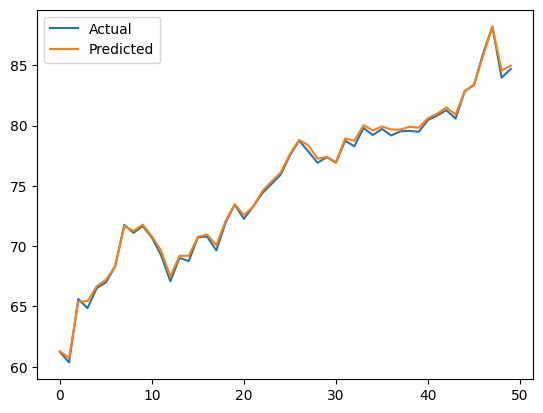

In [127]:
df_pred[['Actual', 'Predicted']].plot()

#Using Decision Tree

In [133]:
df2 = df['Close']

In [134]:
df2.tail()

Date
2020-06-23    91.632500
2020-06-24    90.014999
2020-06-25    91.209999
2020-06-26    88.407501
2020-06-29    90.445000
Name: Close, dtype: float64

In [135]:
df2 = pd.DataFrame(df2)

In [136]:
df2.tail()

Close
Date                 
2020-06-23  91.632500
2020-06-24  90.014999
2020-06-25  91.209999
2020-06-26  88.407501
2020-06-29  90.445000

In [138]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [139]:
df2.tail()

Close  Prediction
Date                             
2020-06-23  91.632500         NaN
2020-06-24  90.014999         NaN
2020-06-25  91.209999         NaN
2020-06-26  88.407501         NaN
2020-06-29  90.445000         NaN

In [140]:
x = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(x)

[[46.79499817]
 [45.97999954]
 [46.34999847]
 [46.99250031]
 [47.64500046]
 [47.58750153]
 [46.97000122]
 [47.75749969]
 [47.83250046]
 [47.72750092]
 [47.86249924]
 [47.59999847]
 [47.97000122]
 [47.86000061]
 [47.90250015]
 [48.25      ]
 [48.70500183]
 [48.55250168]
 [47.74499893]
 [47.47750092]
 [47.57249832]
 [50.375     ]
 [51.84749985]
 [51.99750137]
 [52.26750183]
 [51.77750015]
 [51.8125    ]
 [52.22000122]
 [51.88249969]
 [52.21749878]
 [52.4375    ]
 [52.56000137]
 [53.33000183]
 [54.39500046]
 [53.86500168]
 [53.75999832]
 [53.76250076]
 [53.87250137]
 [54.04000092]
 [54.48500061]
 [54.92499924]
 [55.74499893]
 [56.25749969]
 [56.90750122]
 [57.09000015]
 [56.71749878]
 [55.77500153]
 [55.32500076]
 [54.58250046]
 [55.96250153]
 [55.26750183]
 [56.60250092]
 [55.95999908]
 [54.47000122]
 [54.56000137]
 [54.59249878]
 [55.00749969]
 [54.41500092]
 [55.19749832]
 [55.54750061]
 [55.10499954]
 [56.23749924]
 [56.43500137]
 [56.81499863]
 [57.31999969]
 [58.01750183]
 [56.99750

In [141]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[44.19499969 43.07249832 43.65499878 43.56000137 45.23500061 44.88750076
 44.64500046 46.20500183 44.17250061 43.68000031 42.12250137 42.40000153
 42.15750122 42.27500153 42.73749924 41.36999893 40.98500061 41.51750183
 40.22249985 39.20750046 37.68249893 36.70750046 39.29249954 39.03749847
 39.05749893 39.43500137 39.47999954 35.54750061 37.06499863 36.98249817
 37.6875     38.32749939 38.45000076 38.07249832 37.5        38.26750183
 38.73500061 38.96500015 39.20500183 38.32500076 38.47999954 38.17499924
 39.43999863 39.07500076 38.66999817 41.3125     41.61000061 41.63000107
 42.8125     43.54499817 43.56000137 42.73500061 42.60250092 42.35749817
 42.72249985 42.54499817 42.70000076 42.60499954 42.73249817 43.00749969
 42.76499939 43.24250031 43.55749893 43.58250046 43.71749878 43.28749847
 43.74250031 43.96250153 43.88249969 43.63000107 43.125      43.22750092
 44.72499847 45.22750092 45.42750168 45.93249893 46.52999878 47.00500107
 46.63249969 47.04000092 48.77249908 47.76250076 47

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [151]:
# Implementing Decision Tree Regression Algorithm
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [152]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[54.6875    ],
       [54.97499847],
       [55.17499924],
       [55.69250107],
       [55.24000168],
       [54.43249893],
       [54.68000031],
       [54.41999817],
       [55.25749969],
       [54.97249985],
       [54.70500183],
       [55.99250031],
       [56.14749908],
       [54.74000168],
       [55.20500183],
       [56.75249863],
       [56.76499939],
       [56.09999847],
       [56.75749969],
       [57.52249908],
       [59.05250168],
       [58.96749878],
       [58.83000183],
       [58.59249878],
       [58.81999969],
       [59.10250092],
       [60.12749863],
       [59.99000168],
       [60.79499817],
       [60.89500046],
       [61.64500046],
       [62.26250076],
       [60.82249832],
       [60.81499863],
       [62.18999863],
       [63.95500183],
       [64.375     ],
       [64.28250122],
       [64.30999756],
       [64.85749817],
       [65.03500366],
       [65.55000305],
       [65.48999786],
       [66.11750031],
       [65.66000366],
       [66

In [153]:
treePrediction = tree.predict(x_future)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [81.23750305 80.00749969 46.63249969 79.90249634 43.56000137 81.21749878
 81.23750305 42.60499954 43.56000137 80.07499695 47.18000031 74.54499817
 72.01999664 47.18000031 42.73249817 68.33999634 74.70249939 72.33000183
 75.68499756 73.23000336 72.25749969 72.25749969 62.05749893 68.85749817
 62.05749893 69.49250031 60.55250168 63.21500015 61.38000107 61.19499969
 57.31000137 56.09249878 61.72000122 61.38000107 64.61000061 60.22750092
 63.70249939 60.22750092 60.22750092 60.35250092 60.35250092 65.61750031
 70.69999695 70.79250336 66.99749756 68.3125     71.76249695 71.10749817
 71.67250061 70.69999695 69.23249817 67.09249878 70.79250336 68.75749969
 71.76249695 70.79250336 60.35250092 69.23249817 68.3125     72.26750183
 71.76249695 74.38999939 75.15750122 75.15750122 77.53250122 78.75250244
 77.85250092 76.91249847 78.75250244 76.92749786 78.73999786 78.28500366
 79.80750275 79.80750275 79.72250366 79.18250275 79.52749634 79.5625
 79.48500061 79.5625     79.

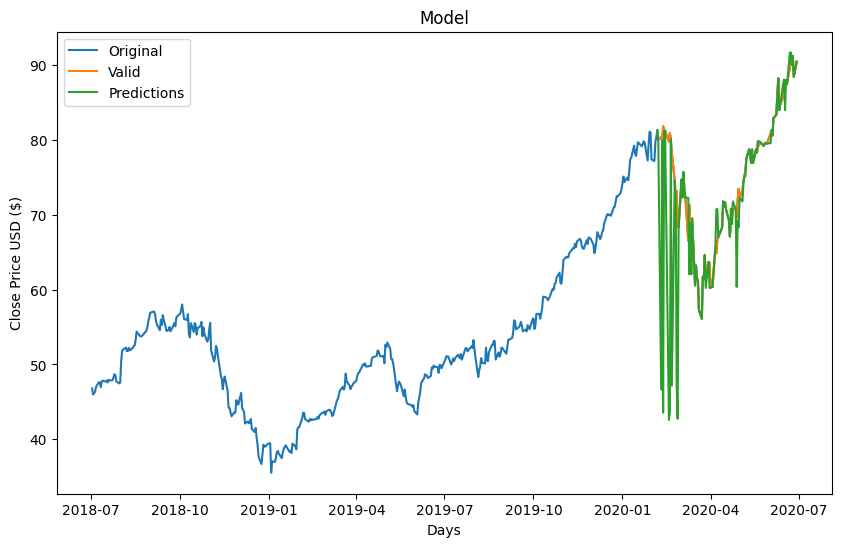

In [154]:
predictions = treePrediction
valid = df[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

**ANN**

In [185]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [195]:
print(df.shape)
data=df.copy()


(502, 5)


In [203]:
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Define the network model and its arguments.
# Set the number of neurons/nodes for each
classifier= Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
# Compile the model and calculate its
classifier.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# Print a summary of the Keras model:
classifier.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                128       
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 469
Trainable params: 469
Non-trainable params: 0
_________________________________________________________________


#**CNN**

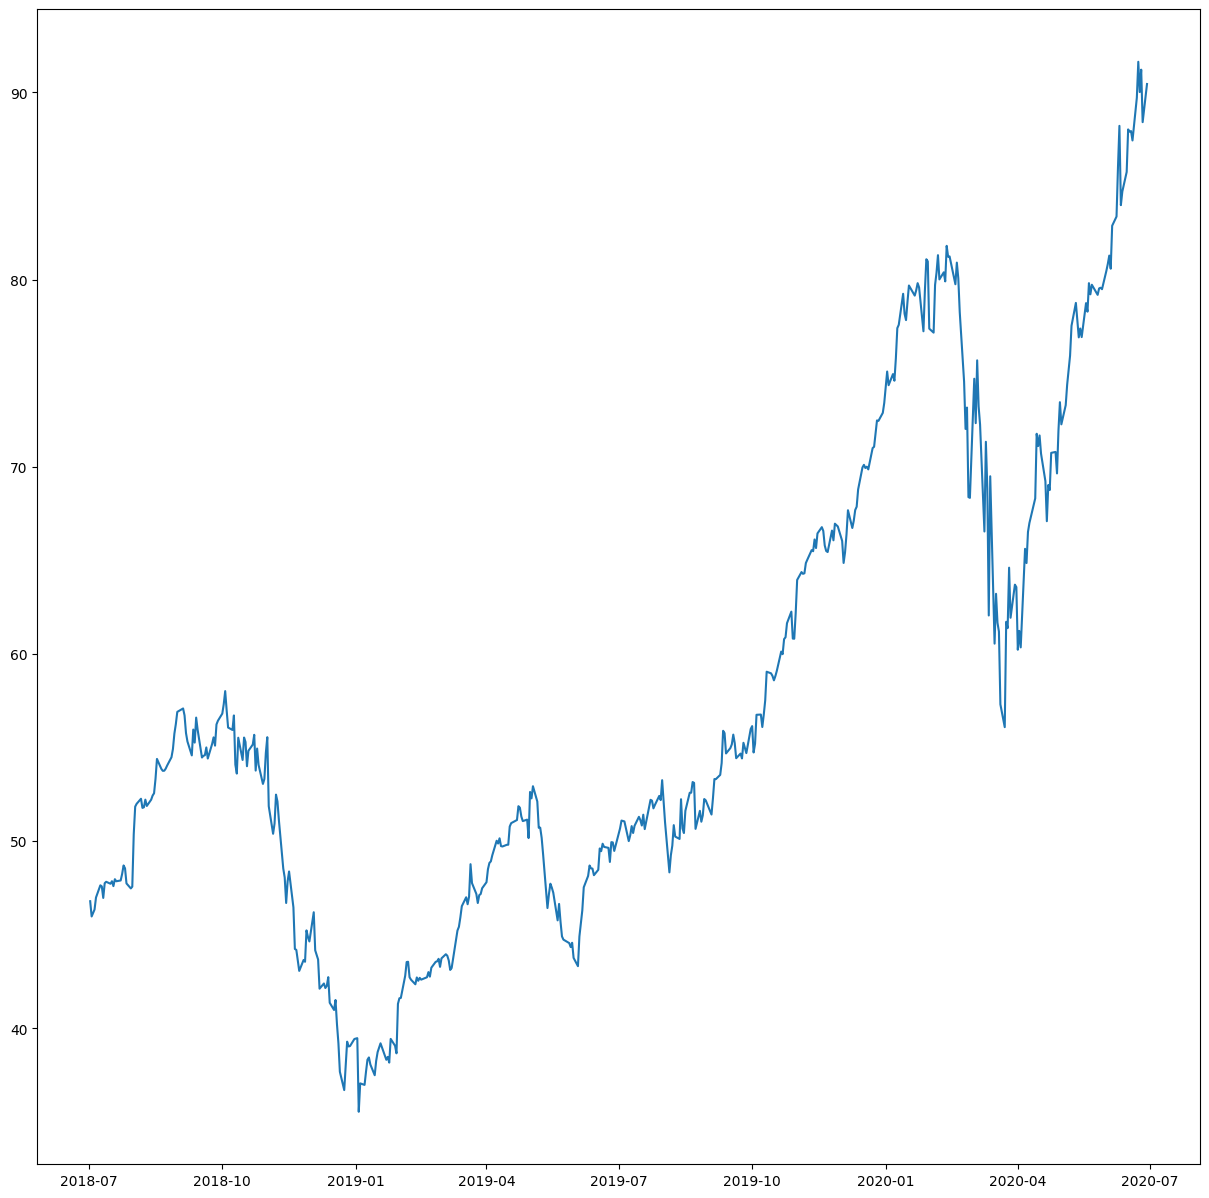

In [155]:
plt.figure(figsize=(15,15))
plt.plot(df['Close'])

In [156]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)   #Jadi numpy array, tidak lagi pandas

y_close = df[:,1]

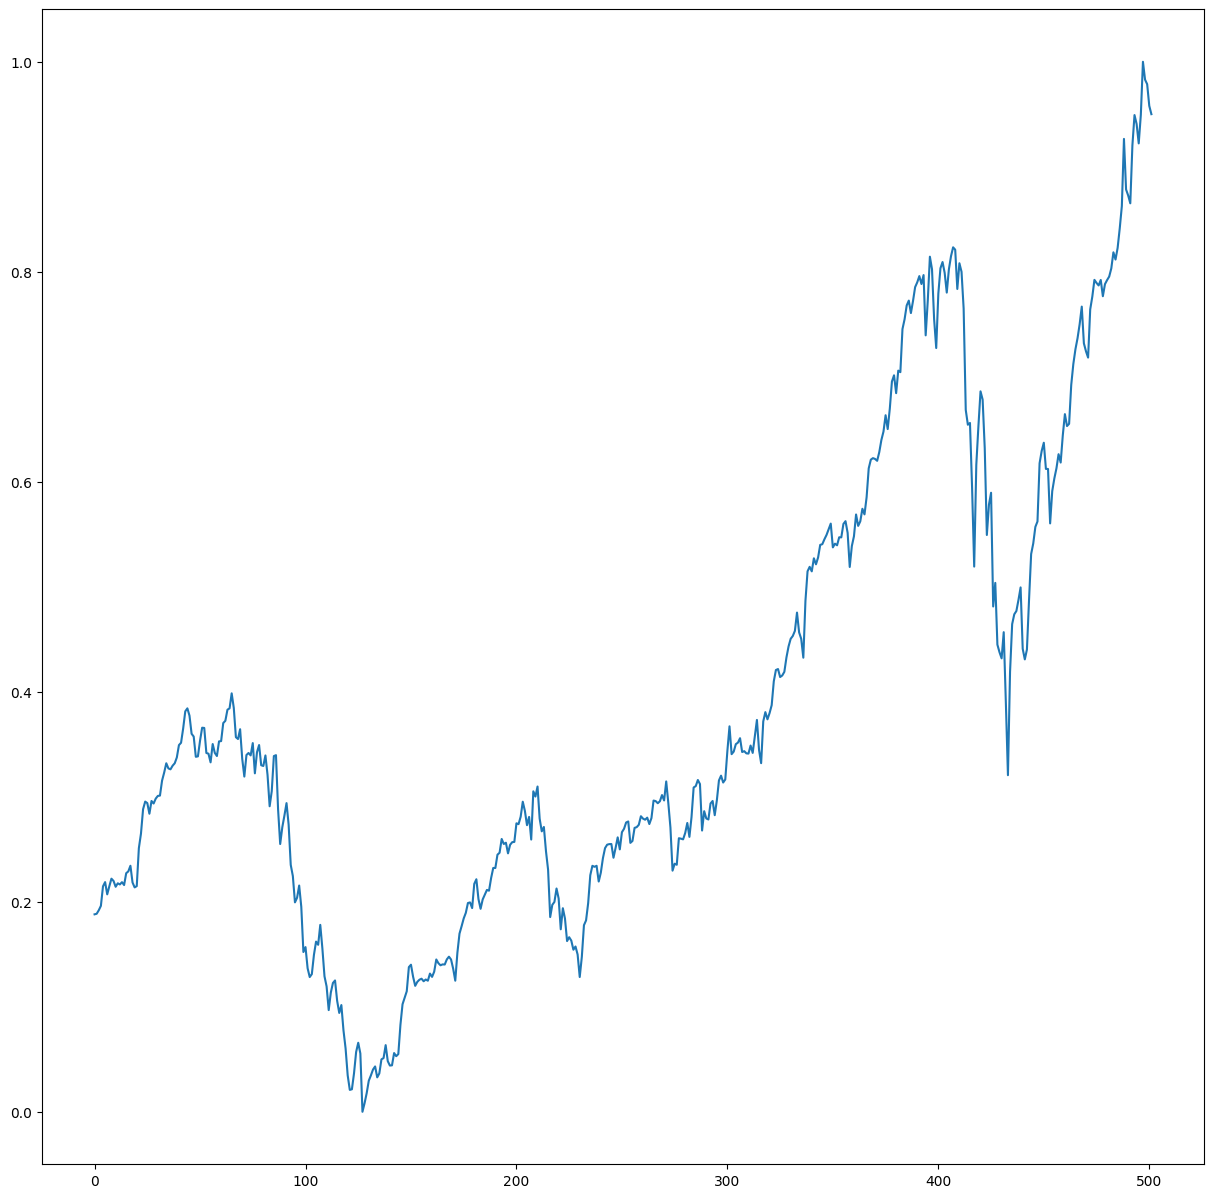

In [157]:
plt.figure(figsize=(15,15))
plt.plot(y_close)
plt.show()

In [159]:
ntrain = int(len(y_close)*0.8)

train = df[0:ntrain]
test  = df[ntrain:len(df)]

y_close_train = y_close[0:ntrain]
y_close_test  = y_close[ntrain:len(y_close)]

In [160]:
y_close_test.shape

(101,)

#Implementing CNN

In [167]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras.layers import Conv1D, Conv2D, MaxPooling2D
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
import csv

In [168]:
import collections
from scipy.stats import zscore
from datetime import datetime

In [205]:
cnn = Sequential()
cnn.add(Conv2D(8, kernel_size = (1, 2), strides = (1, 1),  padding = 'valid',
               activation = 'relu', input_shape = (1,10,5)))
cnn.add(MaxPooling2D(pool_size = (1,2)))

cnn.add(Flatten())
cnn.add(Dense(64, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="relu"))
cnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1, 9, 8)           88        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 4, 8)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                     

In [206]:
cnn.compile(loss='mean_squared_error', optimizer='nadam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=2, verbose=2, mode='auto')
checkpointer = ModelCheckpoint(filepath="CNN_Parameters.hdf5", verbose=0, save_best_only=True) # save best mod

In [207]:
history = cnn.fit(x_train,y_train,validation_split=0.2,batch_size = 128, callbacks=[checkpointer],verbose=1,epochs = 100)

Epoch 1/100
3/3 [==============================] - 2s 102ms/step - loss: 0.0463 - val_loss: 0.2958
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0442 - val_loss: 0.2335
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0390 - val_loss: 0.1746
Epoch 4/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0352 - val_loss: 0.1271
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0304 - val_loss: 0.0967
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0378 - val_loss: 0.0924
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0272 - val_loss: 0.0800
Epoch 8/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0251 - val_loss: 0.0697
Epoch 9/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0232 - val_loss: 0.0612
Epoch 10/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0219 - val_loss: 0.0509
Epoch 11/100
3/3 [

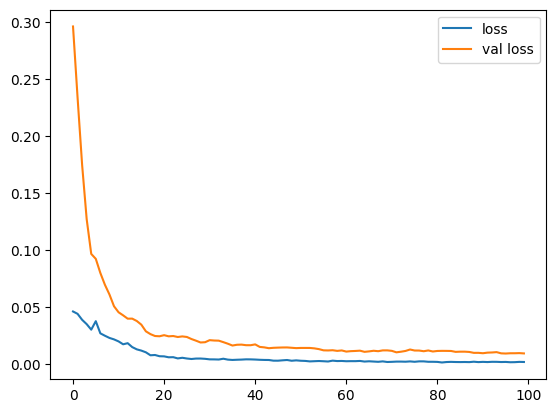

In [208]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()

In [209]:
cnn.load_weights('CNN_Parameters.hdf5')

pred = cnn.predict(x_test)
print(pred.shape)

3/3 [==============================] - 0s 6ms/step
(90, 1)


In [210]:
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("RMSE Score: {}".format(score))

RMSE Score: 0.1276330615219023


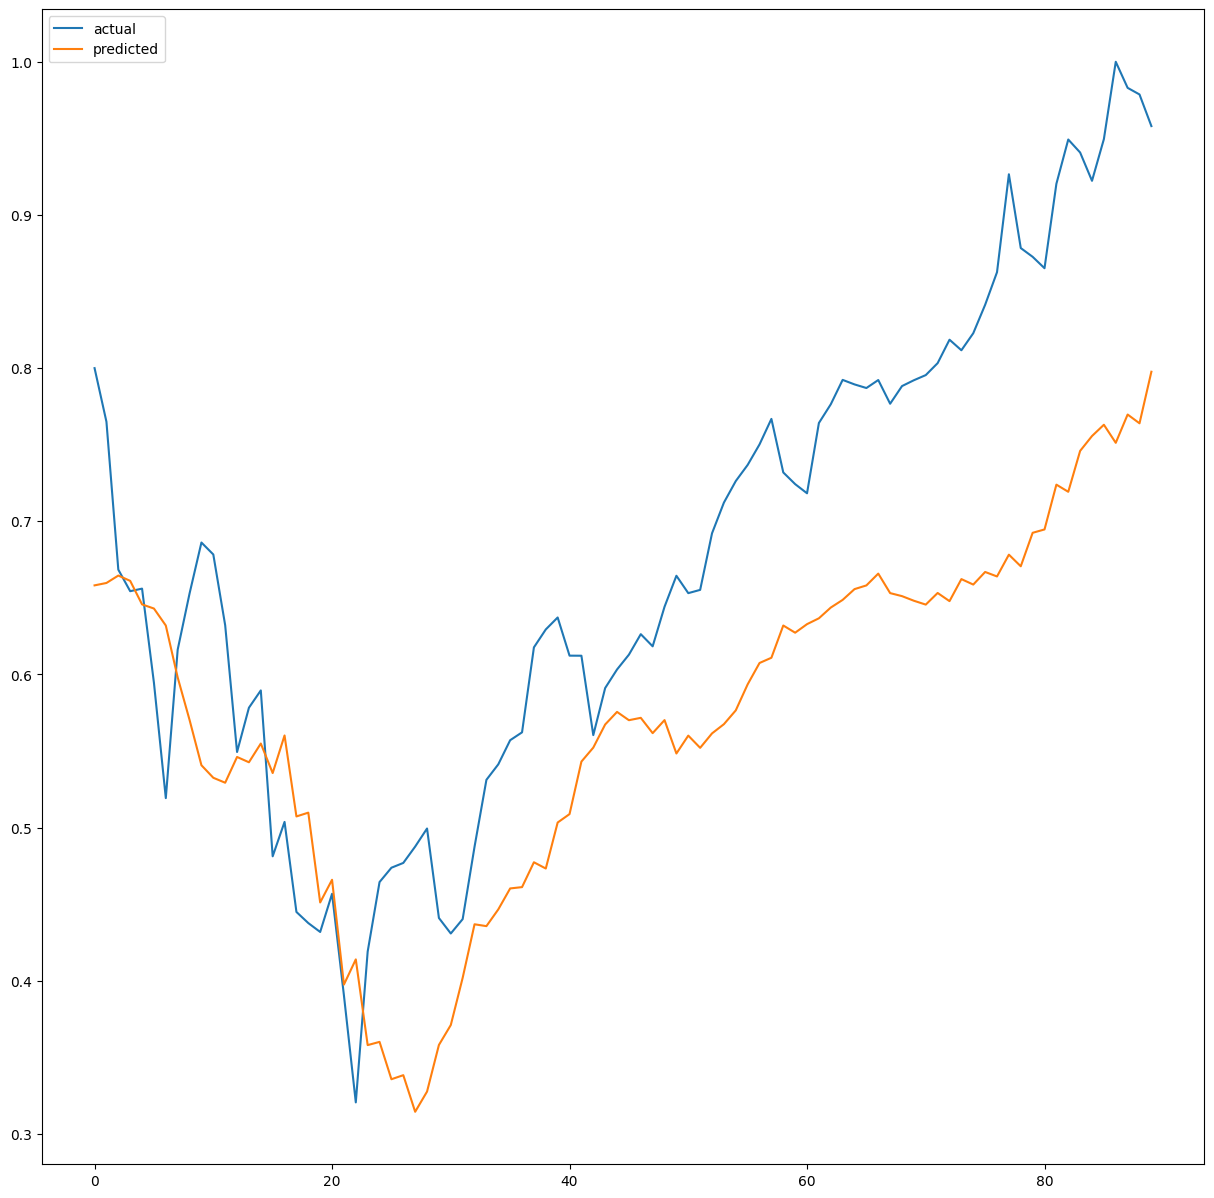

In [211]:
plt.figure(figsize=(15,15))

plt.plot(y_test, label = 'actual')
plt.plot(pred,   label = 'predicted')
plt.legend()
plt.show()

#K-Fold

In [222]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [223]:
kf =KFold(n_splits=3, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 2, Test set:2
Fold:2, Train set: 3, Test set:1
Fold:3, Train set: 3, Test set:1
